Muhammad Arfan

Capstone Project - 2

Data Science


Pertanyaan:
1. Dimana lokasi yang potensial untuk mengembangkan bisnis airbnb di Bangkok?

2. Apa jenis properti yang paling tepat untuk dipilih sebagai objek bisnis utama?

3. Berapa harga yang sesuai dan pendapatan potensial untuk properti tersebut?

4. Siapa current host yang berpotensial untuk dijadikan mitra bisnis?

5. Bagaimana tren seasonal airbnb di bangkok?

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import probplot
from scipy.stats import anderson
from scipy.stats import kruskal


In [137]:
#Buka data
df = pd.read_csv("Airbnb Listings Bangkok.csv")
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [138]:
#cek korelasi dengan asumsi data tidak terdistribusi normal
numerical_df = df.select_dtypes(include=['number'])
spearman_corr = numerical_df.corr(method='spearman')
spearman_corr

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
Unnamed: 0,1.000000,0.999869,0.513876,0.010232,0.016161,0.077374,-0.013895,-0.268402,0.352848,0.250227,-0.023785,0.127996
id,0.999869,1.000000,0.513981,0.010070,0.016332,0.077390,-0.014021,-0.268581,0.352999,0.250315,-0.023742,0.127723
host_id,0.513876,0.513981,1.000000,0.071296,0.013164,0.025219,-0.120579,-0.264099,0.050886,0.027658,0.010728,-0.064100
latitude,0.010232,0.010070,0.071296,1.000000,-0.061282,-0.047724,-0.096306,-0.048682,-0.028465,-0.019436,0.016674,-0.081968
longitude,0.016161,0.016332,0.013164,-0.061282,1.000000,-0.069085,0.099712,-0.051086,-0.030730,-0.112823,-0.018779,-0.034402
price,0.077374,0.077390,0.025219,-0.047724,-0.069085,1.000000,-0.102200,-0.020659,0.136806,0.084520,-0.000549,0.043726
minimum_nights,-0.013895,-0.014021,-0.120579,-0.096306,0.099712,-0.102200,1.000000,0.036323,-0.065629,-0.127058,-0.124878,0.012733
number_of_reviews,-0.268402,-0.268581,-0.264099,-0.048682,-0.051086,-0.020659,0.036323,1.000000,0.597364,0.221142,-0.264044,0.705412
reviews_per_month,0.352848,0.352999,0.050886,-0.028465,-0.030730,0.136806,-0.065629,0.597364,1.000000,0.239922,-0.114746,0.713749
calculated_host_listings_count,0.250227,0.250315,0.027658,-0.019436,-0.112823,0.084520,-0.127058,0.221142,0.239922,1.000000,-0.054202,0.276462


In [139]:
#Cek statistik deskriptif data
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


CLEANING DATA

CEK STRUKTUR DATA 

In [140]:
#cek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Cek Duplikat pada Key Data

In [141]:
duplikat_id = df['id'].duplicated(keep=False).sum()
print(f"Jumlah data duplikat di kolom 'id': {duplikat_id}")

Jumlah data duplikat di kolom 'id': 0


CEK MISSING VALUE

In [142]:
#cek persentase missing value
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print(missing_percentage)

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64


In [143]:
#identifikasi data numerik missing: number of reviews, reviews per month, dan name 

PENANGANAN MISSING VALUE - REVIEWS PER MONTH

In [144]:
#pengisian data NAN
#mengisi data review per month menjadi 0, apabila number of review = 0
df.loc[df['number_of_reviews']==0 & df['reviews_per_month'].isna(), 'reviews_per_month'] = 0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

PENANGANAN MISSING VALUES - LAST_REVIEW

In [146]:
#ubah format data
df['last_review'] = pd.to_datetime(df['last_review'])

In [147]:
#mengisi data last_review yang kosong dengan data last_review pada host_id yang sama

latest_reviews = df.groupby('host_id')['last_review'].max()
df['latest_last_review'] = df['host_id'].map(latest_reviews)
df['last_review'] = df['last_review'].fillna(df['latest_last_review'])
df.drop(columns=['latest_last_review'], inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15846 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_nights                  15854 non-null  int64         
 11  nu

PENANGAN DATA NAN - NAME

In [149]:
#Mengisi data name dengan name dari host_id yang sama
host_name_map = df[df['name'].notna()].groupby('host_id')['name'].max()

multiple_listings = df['calculated_host_listings_count'] > 1
df.loc[multiple_listings, 'name'] = df.loc[multiple_listings, 'name'].fillna(df['host_id'].map(host_name_map))

In [150]:
#cek struktur data setelah pengisian data NAN di Name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15847 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_nights                  15854 non-null  int64         
 11  nu

In [151]:
#data name yang tidak memiliki host_id yang sama akan tetap dibiarkan menjadi NAN karena tidak akan mempengaruhi analisa data

PENANGAN DATA NAN - HOST_NAME

In [152]:
#cek data kosong pada host_name
missing_host_name= df[df['host_name'].isna()]
missing_host_name

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [153]:
#cek host_id, jika memiliki host_id yang sama maka bisa diisi
df['host_name'] = df['host_name'].fillna(df.groupby('host_id')['host_name'].transform('first'))

#cek struktur data setelah pengisian data NAN di Host Name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15847 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_nights                  15854 non-null  int64         
 11  nu

In [154]:
#cek persentase missing value
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print(missing_percentage)

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.044153
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       21.779992
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64


In [155]:
#host_name yang memiliki data NAN tidak memiliki host_id yang sama pada data airbnb lainnya
#data dibiarkan NAN karena tidak mempengaruhi analisa

PENANGANAN ANOMALI DATA

DATA ANOMALI:

1. price <= 0

2. minimum_nights <= 0

3. minimum_nights >365

4. availability_365 > 365

In [156]:
#cek anomali data
anomaly_price = df[df['price'] <= 0]
anomaly_minimum_night_zero = df[df['minimum_nights'] <= 0]
anomaly_minimum_night_large = df[df['minimum_nights'] > 365]
anomaly_availability = df[df['availability_365'] > 365]

count_anomaly_price = (df['price'] <= 0).sum()
count_anomaly_minimum_night_zero = (df['minimum_nights'] <= 0).sum()
count_anomaly_minimum_night_large = (df['minimum_nights'] > 365).sum()
count_anomaly_availability = (df['availability_365'] > 365).sum()


print("Jumlah data anomali untuk setiap kondisi:")
print(f"1. Price <= 0: {count_anomaly_price}")
print(f"2. Minimum Night <= 0: {count_anomaly_minimum_night_zero}")
print(f"3. Minimum Night > 365: {count_anomaly_minimum_night_large}")
print(f"4. Availability_365 > 365: {count_anomaly_availability}")



Jumlah data anomali untuk setiap kondisi:
1. Price <= 0: 1
2. Minimum Night <= 0: 0
3. Minimum Night > 365: 15
4. Availability_365 > 365: 0


PENANGANAN ANOMALI - PRICE

In [157]:
#cek apakah data yang memiliki price <= 0 memiliki host_id yang sama di data lain
hosts_with_zero_price = anomaly_price['host_id'].unique()
other_listings = df[df['host_id'].isin(hosts_with_zero_price)]
other_listings

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,0.0,1,0,0


In [158]:
#karena hanya memiliki satu listing, maka data price tidak bisa diisi. Data tersebut akan dihapus.
df = df[df['price'] > 0]

PENANGANAN ANOMALI - MINIMUM NIGHT

In [159]:
def fill_minimum_night(group):
   
    skewness = group.skew()  
    if skewness > 1 or skewness < -1:  
        return group.fillna(group.median())
    else: 
        return group.fillna(group.mean())

df['minimum_nights'] = df.groupby('host_id')['minimum_nights'].transform(fill_minimum_night)
df = df[df['minimum_nights'] <= 365]

Klasifikasi listing aktif dan tidak aktif

In [160]:
condition1 = (df['number_of_reviews'] == 0) & (df['availability_365'] == 0)
condition2 = (df['number_of_reviews'] == 0) & (df['minimum_nights'] == 0)

# Menambahkan kolom 'status' untuk klasifikasi
df['status'] = 'Aktif'  # Default status
df.loc[condition1 | condition2, 'status'] = 'Tidak Aktif'

# Menampilkan jumlah data aktif dan tidak aktif
print(df['status'].value_counts())

status
Aktif          15583
Tidak Aktif      255
Name: count, dtype: int64


In [161]:
#pengecekan struktur data setelah penanganan anomali dan data NAN
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15838 entries, 0 to 15853
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15838 non-null  int64         
 1   id                              15838 non-null  int64         
 2   name                            15831 non-null  object        
 3   host_id                         15838 non-null  int64         
 4   host_name                       15837 non-null  object        
 5   neighbourhood                   15838 non-null  object        
 6   latitude                        15838 non-null  float64       
 7   longitude                       15838 non-null  float64       
 8   room_type                       15838 non-null  object        
 9   price                           15838 non-null  int64         
 10  minimum_nights                  15838 non-null  int64         
 11  number_

PENGECEKAN DISTRIBUSI DATA: PRICE, NUMBER OF REVIEWS, MINIMUM NIGHT, AVAILABILITY_365, dan REVIEW PER MONTH

In [162]:
#Uji normalitas pada data numerik
columns_to_test = ['price', 'number_of_reviews', 'minimum_nights', 'availability_365', 'reviews_per_month']

results_before = []
for column in columns_to_test:
    result = anderson(df[column], dist='norm')  
    critical_value_5_percent = result.critical_values[2] 
    normal_at_5_percent = result.statistic < critical_value_5_percent 
    
    results_before.append({
        'Column': column,
        'Anderson-Darling Statistic': result.statistic,
        'Critical Value (5%)': critical_value_5_percent,
        'Normal (5%)': normal_at_5_percent
    })


before_df = pd.DataFrame(results_before)


print(before_df)

              Column  Anderson-Darling Statistic  Critical Value (5%)  \
0              price                 5141.486382                0.787   
1  number_of_reviews                 2847.652481                0.787   
2     minimum_nights                 3699.104575                0.787   
3   availability_365                 1035.062873                0.787   
4  reviews_per_month                 1949.810000                0.787   

   Normal (5%)  
0        False  
1        False  
2        False  
3        False  
4        False  


Visualisasi untuk kolom: price


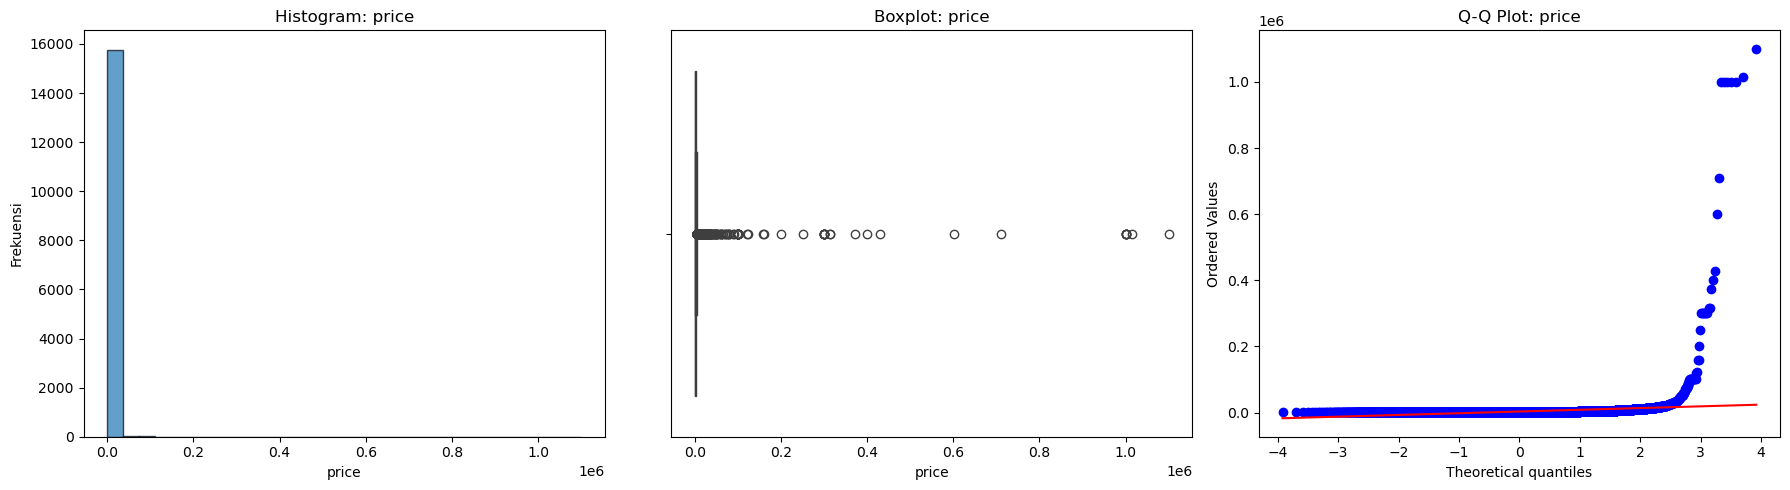

Visualisasi untuk kolom: number_of_reviews


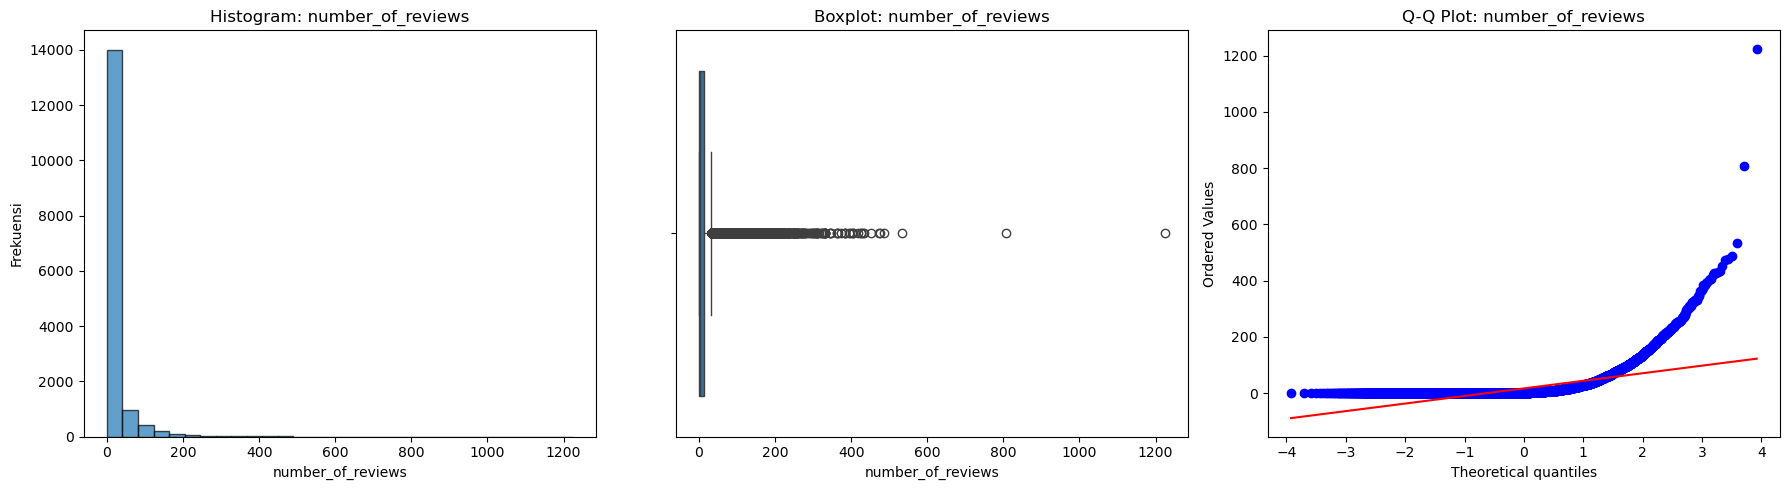

Visualisasi untuk kolom: minimum_nights


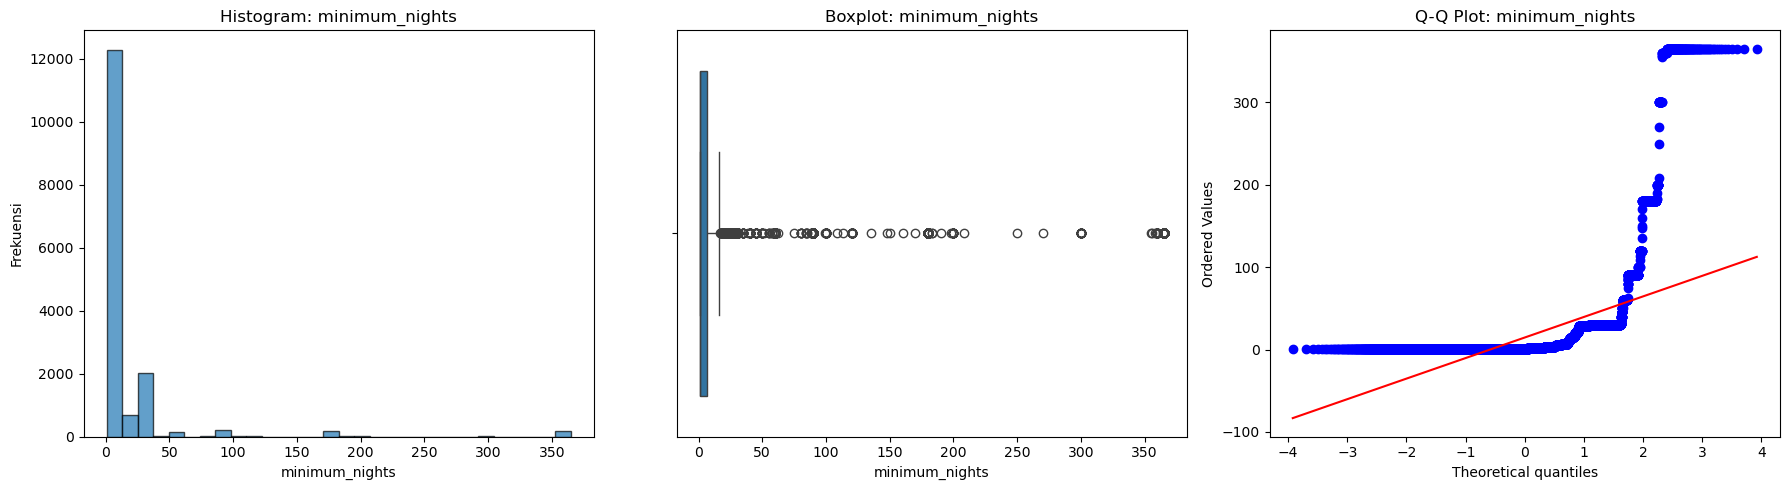

Visualisasi untuk kolom: availability_365


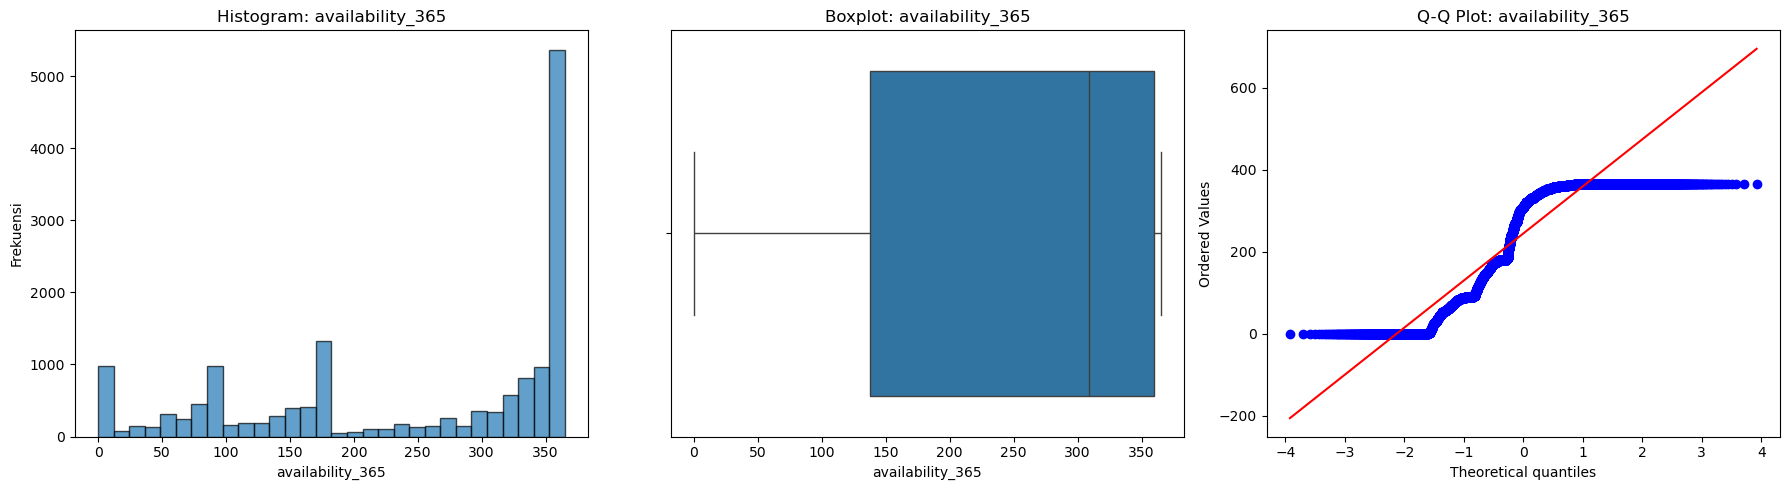

Visualisasi untuk kolom: reviews_per_month


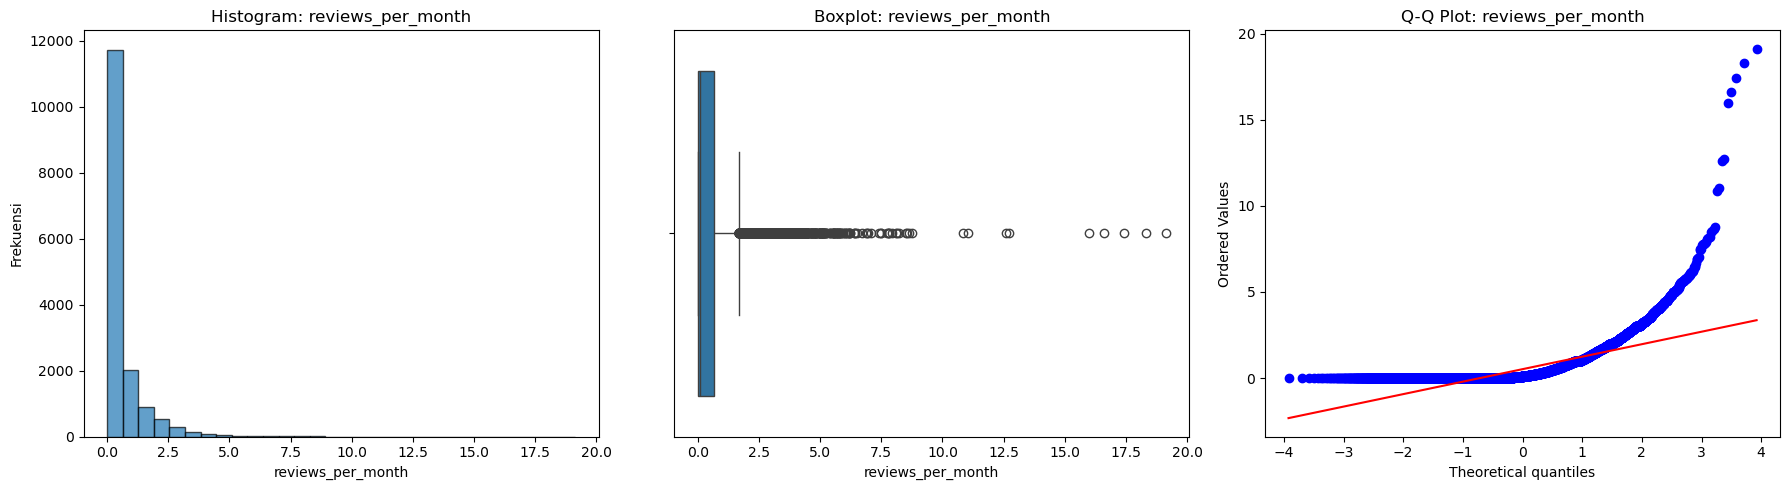

In [163]:
#Pengecekan normalitas pada data numerik dengan visualisasi histogram, boxplot, dan Q-Q plot
for column in columns_to_test:
    print(f"Visualisasi untuk kolom: {column}")
    
    
    plt.figure(figsize=(18, 5))
    
    # Histogram
    plt.subplot(1, 3, 1)
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram: {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot: {column}")
    plt.xlabel(column)
    
    # Q-Q Plot
    plt.subplot(1, 3, 3)
    probplot(df[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {column}")

    plt.tight_layout()
    plt.show()

Handling Distribusi Data - PRICE

In [164]:
#Uji outlier
##Target data untuk dianalisis tidak mempertimbangkan listing premium (berharga sangat mahal ataupun terlalu murah)
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_boundary_price = Q1_price - 1.5 * IQR_price
upper_boundary_price = Q3_price + 1.5 * IQR_price
print(f"Lower Boundary: {lower_boundary_price}, Upper Boundary: {upper_boundary_price}")

outliers_price = df[(df['price'] < lower_boundary_price) | (df['price'] > upper_boundary_price)]
print(f"Jumlah outlier: {len(outliers_price)}")

Lower Boundary: -1393.5, Upper Boundary: 4722.5
Jumlah outlier: 1398


In [165]:

df = df[(df['price'] >= lower_boundary_price) & (df['price'] <= upper_boundary_price)]
# df_no_outliers

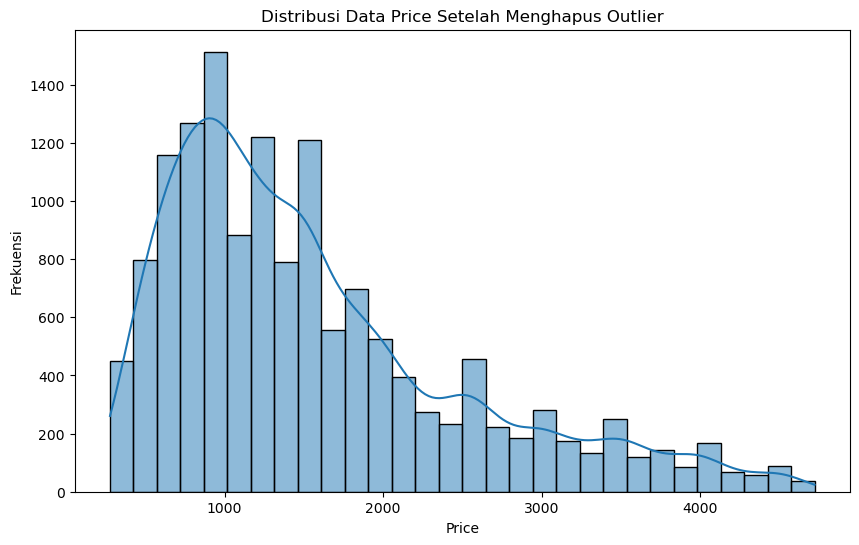

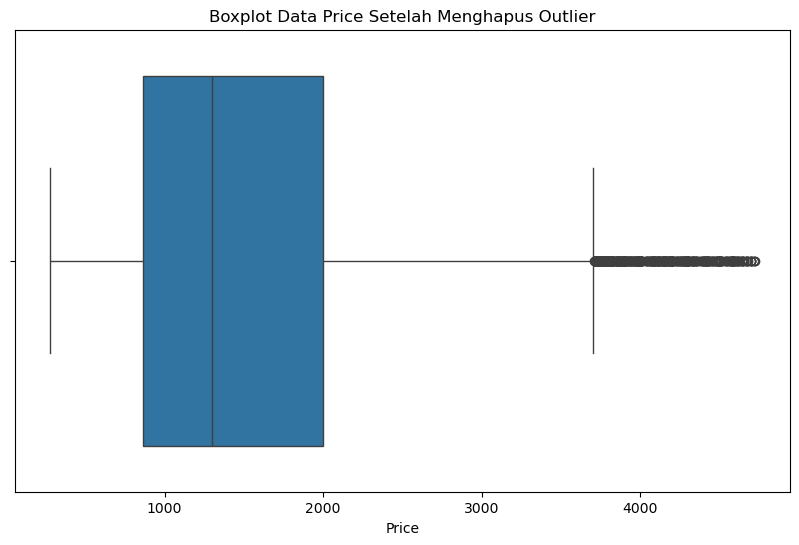

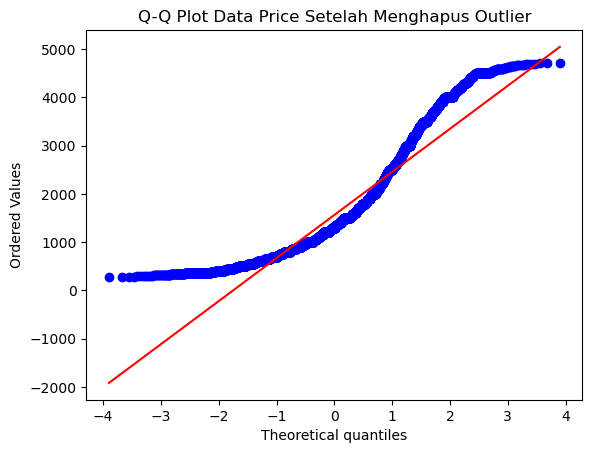

In [166]:
#Cek distribusi price setelah outlier dihapus
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribusi Data Price Setelah Menghapus Outlier")
plt.xlabel("Price")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title("Boxplot Data Price Setelah Menghapus Outlier")
plt.xlabel("Price")
plt.show()



stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("Q-Q Plot Data Price Setelah Menghapus Outlier")
plt.show()

In [167]:
result_price = anderson(df['price'], dist='norm')

print("Anderson-Darling Test Statistic:", result_price.statistic)
print("\nCritical Values and Significance Levels:")
for significance_level, critical_value in zip(result_price.significance_level, result_price.critical_values):
    print(f"Significance Level: {significance_level}%, Critical Value: {critical_value}")


if result.statistic <= result_price.critical_values[2]:  
    print("\nKesimpulan: Kolom 'price' berdistribusi normal pada tingkat signifikansi 5%.")
else:
    print("\nKesimpulan: Kolom 'price' tidak berdistribusi normal pada tingkat signifikansi 5%.")


Anderson-Darling Test Statistic: 457.5086820788747

Critical Values and Significance Levels:
Significance Level: 15.0%, Critical Value: 0.576
Significance Level: 10.0%, Critical Value: 0.656
Significance Level: 5.0%, Critical Value: 0.787
Significance Level: 2.5%, Critical Value: 0.918
Significance Level: 1.0%, Critical Value: 1.092

Kesimpulan: Kolom 'price' tidak berdistribusi normal pada tingkat signifikansi 5%.


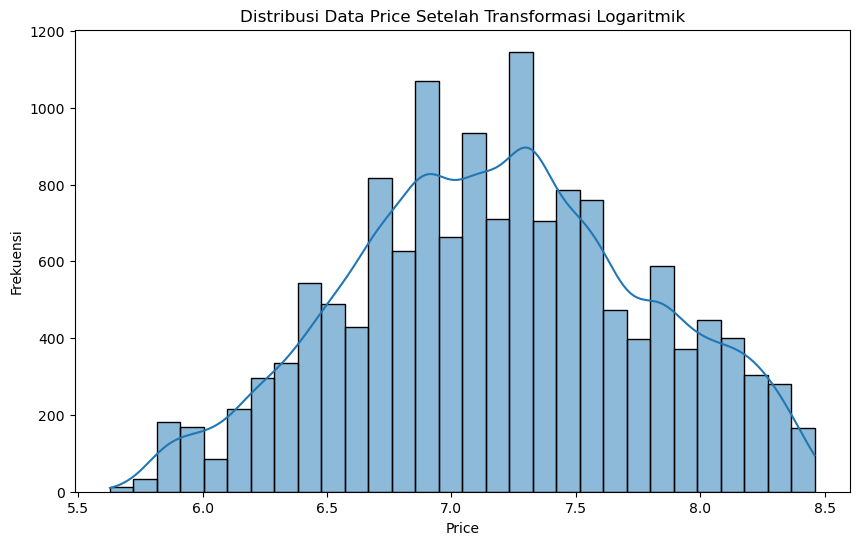

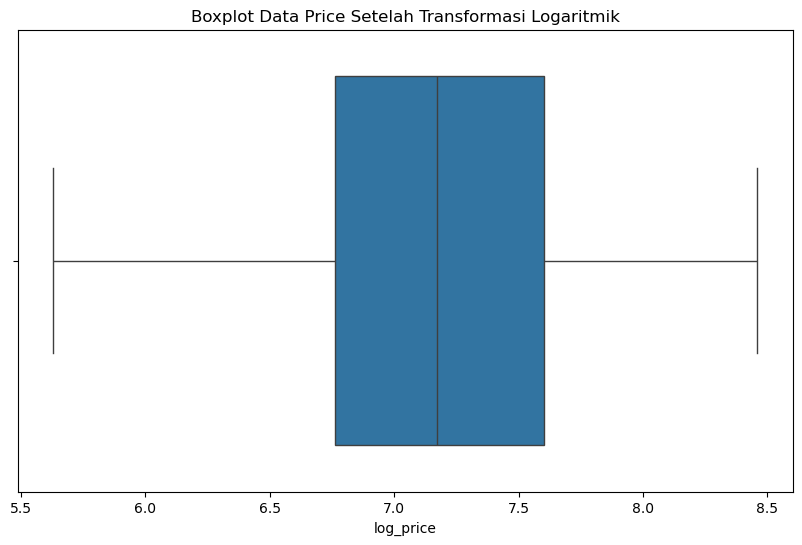

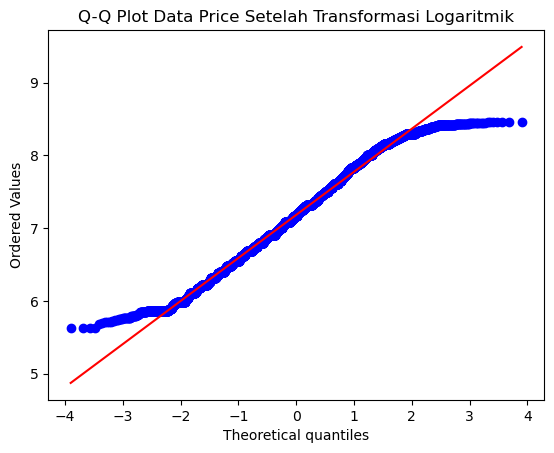

In [168]:
#transformasi logaritmik
df['log_price'] = np.log(df['price'])

#Cek distribusi price setelah outlier dihapus
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=30)
plt.title("Distribusi Data Price Setelah Transformasi Logaritmik")
plt.xlabel("Price")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_price'])
plt.title("Boxplot Data Price Setelah Transformasi Logaritmik")
plt.xlabel("log_price")
plt.show()



stats.probplot(df['log_price'], dist="norm", plot=plt)
plt.title("Q-Q Plot Data Price Setelah Transformasi Logaritmik")
plt.show()

In [169]:
#Uji Anderson-Darling
result_log_price = anderson(df['log_price'], dist='norm')


print("Anderson-Darling Test Statistic:", result_log_price.statistic)
print("\nCritical Values and Significance Levels:")
for significance_level, critical_value in zip(result_log_price.significance_level, result_log_price.critical_values):
    print(f"Significance Level: {significance_level}%, Critical Value: {critical_value}")


if result.statistic <= result_log_price.critical_values[2]: 
    print("\nKesimpulan: Kolom 'price' setelah transformasi log berdistribusi normal pada tingkat signifikansi 5%.")
else:
    print("\nKesimpulan: Kolom 'price' setelah transformasi log tidak berdistribusi normal pada tingkat signifikansi 5%.")


Anderson-Darling Test Statistic: 18.384877028474875

Critical Values and Significance Levels:
Significance Level: 15.0%, Critical Value: 0.576
Significance Level: 10.0%, Critical Value: 0.656
Significance Level: 5.0%, Critical Value: 0.787
Significance Level: 2.5%, Critical Value: 0.918
Significance Level: 1.0%, Critical Value: 1.092

Kesimpulan: Kolom 'price' setelah transformasi log tidak berdistribusi normal pada tingkat signifikansi 5%.


CEK DISTRIBUSI - NUMBER OF REVIEWS

In [170]:
#Uji outlier

Q1_nor = df['number_of_reviews'].quantile(0.25)
Q3_nor = df['number_of_reviews'].quantile(0.75)
IQR_nor = Q3_nor - Q1_nor
batas_bawah_nor = Q1_nor - 1.5 * IQR_nor
batas_atas_nor = Q3_nor + 1.5 * IQR_nor
print(f"Batas Bawah: {batas_bawah_nor}, Batas Atas: {batas_atas_nor}")

outliers_nor = df[(df['number_of_reviews'] < batas_bawah_nor) | (df['number_of_reviews'] > batas_atas_nor)]
print(f"Jumlah outlier: {len(outliers_nor)}")

Batas Bawah: -21.0, Batas Atas: 35.0
Jumlah outlier: 1915


In [171]:
#Nilai batas atas masih dianggap menjadi bagian data penting, sehingga outlier diperhitungkan

In [172]:
df['number_of_reviews'].describe()

count    14440.000000
mean        17.076454
std         41.439756
min          0.000000
25%          0.000000
50%          2.000000
75%         14.000000
max       1224.000000
Name: number_of_reviews, dtype: float64

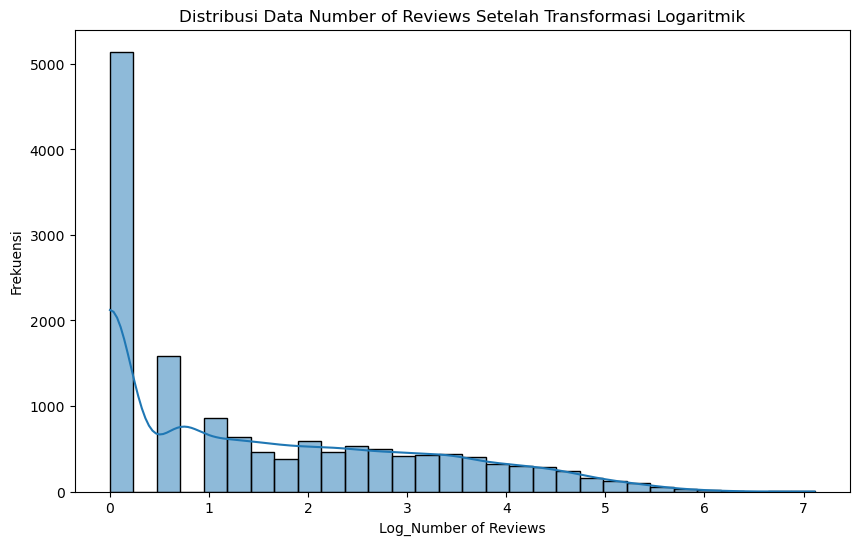

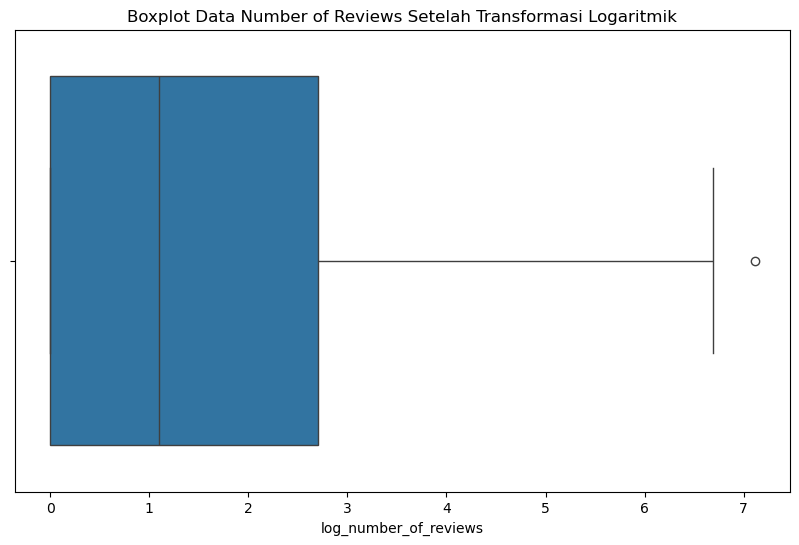

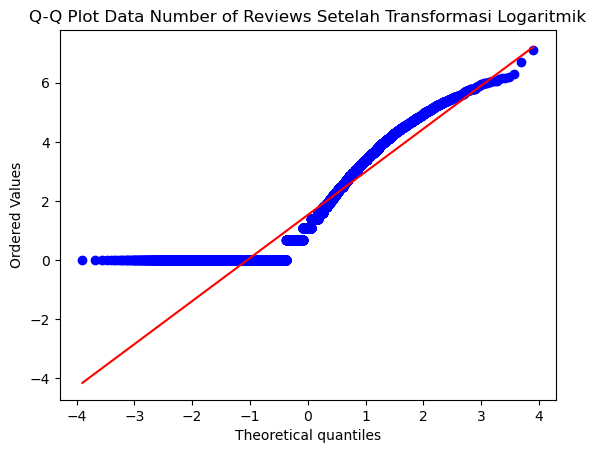

In [173]:
#transformasi logaritmik
df['log_number_of_reviews'] = np.log1p(df['number_of_reviews'])
plt.figure(figsize=(10, 6))
sns.histplot(df['log_number_of_reviews'], kde=True, bins=30)
plt.title("Distribusi Data Number of Reviews Setelah Transformasi Logaritmik")
plt.xlabel("Log_Number of Reviews")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_number_of_reviews'])
plt.title("Boxplot Data Number of Reviews Setelah Transformasi Logaritmik")
plt.xlabel("log_number_of_reviews")
plt.show()



stats.probplot(df['log_number_of_reviews'], dist="norm", plot=plt)
plt.title("Q-Q Plot Data Number of Reviews Setelah Transformasi Logaritmik")
plt.show()

In [174]:
#Uji Anderson-Darling
result_nor = anderson(df['log_number_of_reviews'], dist='norm')

# Tampilkan hasil uji
print("Anderson-Darling Test Statistic:", result_nor.statistic)
print("\nCritical Values and Significance Levels:")
for significance_level, critical_value in zip(result_nor.significance_level, result_nor.critical_values):
    print(f"Significance Level: {significance_level}%, Critical Value: {critical_value}")


if result.statistic <= result_nor.critical_values[2]:  # Nilai kritis pada alpha=5%
    print("\nKesimpulan: Kolom 'number_of_reviews' berdistribusi normal pada tingkat signifikansi 5%.")
else:
    print("\nKesimpulan: Kolom 'number_of_reviews' tidak berdistribusi normal pada tingkat signifikansi 5%.")


Anderson-Darling Test Statistic: 646.341037275195

Critical Values and Significance Levels:
Significance Level: 15.0%, Critical Value: 0.576
Significance Level: 10.0%, Critical Value: 0.656
Significance Level: 5.0%, Critical Value: 0.787
Significance Level: 2.5%, Critical Value: 0.918
Significance Level: 1.0%, Critical Value: 1.092

Kesimpulan: Kolom 'number_of_reviews' tidak berdistribusi normal pada tingkat signifikansi 5%.


CEK DISTRIBUSI - Review Per Month

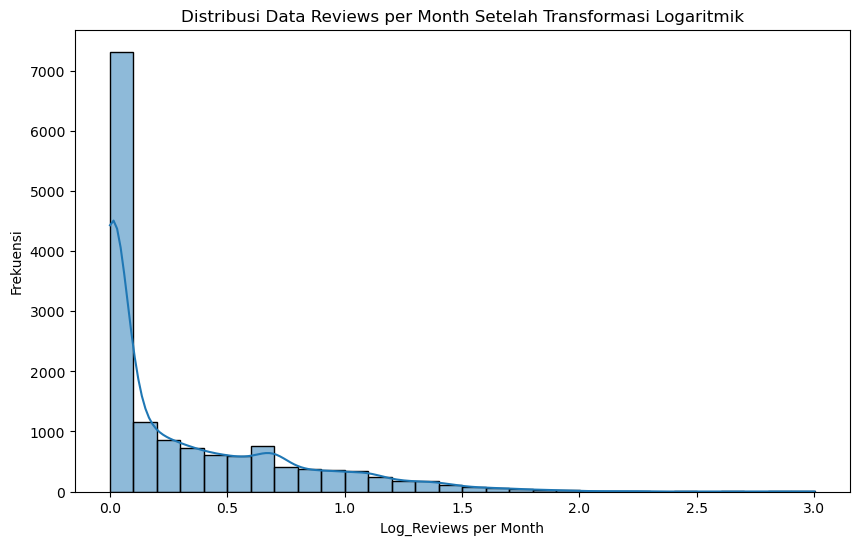

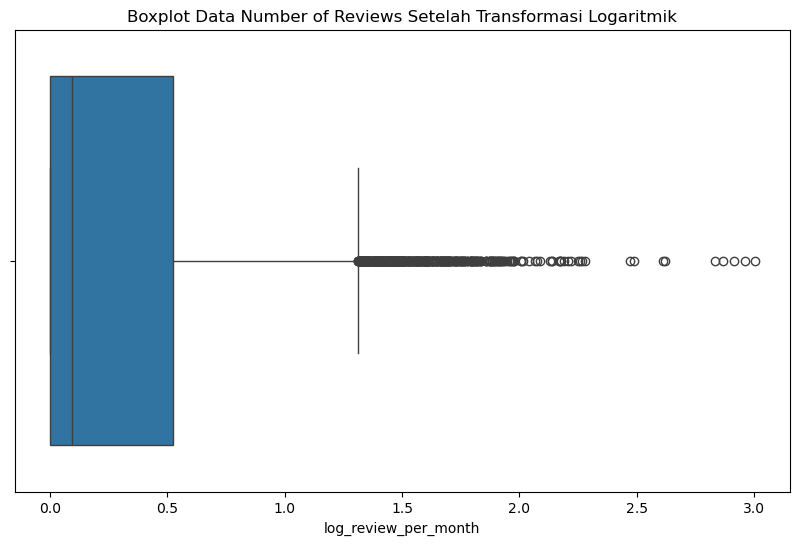

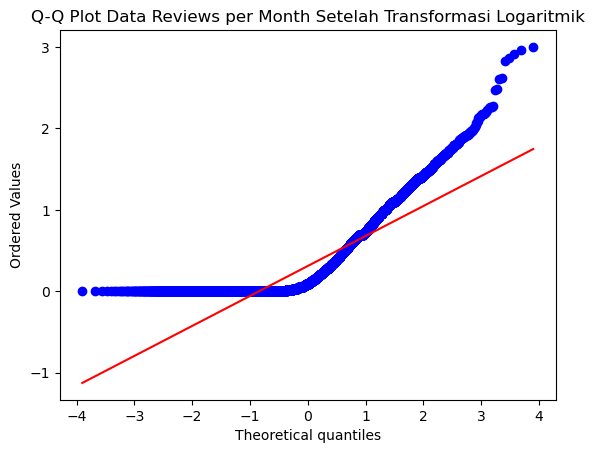

In [175]:
#transformasi logaritmik
df['log_reviews_per_month'] = np.log1p(df['reviews_per_month'])
plt.figure(figsize=(10, 6))
sns.histplot(df['log_reviews_per_month'], kde=True, bins=30)
plt.title("Distribusi Data Reviews per Month Setelah Transformasi Logaritmik")
plt.xlabel("Log_Reviews per Month")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_reviews_per_month'])
plt.title("Boxplot Data Number of Reviews Setelah Transformasi Logaritmik")
plt.xlabel("log_review_per_month")
plt.show()


stats.probplot(df['log_reviews_per_month'], dist="norm", plot=plt)
plt.title("Q-Q Plot Data Reviews per Month Setelah Transformasi Logaritmik")
plt.show()

In [176]:
result_rpm = anderson(df['log_reviews_per_month'], dist='norm')


print("Anderson-Darling Test Statistic:", result_rpm.statistic)
print("\nCritical Values and Significance Levels:")
for significance_level, critical_value in zip(result_rpm.significance_level, result_rpm.critical_values):
    print(f"Significance Level: {significance_level}%, Critical Value: {critical_value}")


if result.statistic <= result_nor.critical_values[2]: 
    print("\nKesimpulan: Kolom 'reviews_per_month' berdistribusi normal pada tingkat signifikansi 5%.")
else:
    print("\nKesimpulan: Kolom 'reviews_per_month' tidak berdistribusi normal pada tingkat signifikansi 5%.")


Anderson-Darling Test Statistic: 1223.1315728039099

Critical Values and Significance Levels:
Significance Level: 15.0%, Critical Value: 0.576
Significance Level: 10.0%, Critical Value: 0.656
Significance Level: 5.0%, Critical Value: 0.787
Significance Level: 2.5%, Critical Value: 0.918
Significance Level: 1.0%, Critical Value: 1.092

Kesimpulan: Kolom 'reviews_per_month' tidak berdistribusi normal pada tingkat signifikansi 5%.


Cek Distribusi - Minimum Nights

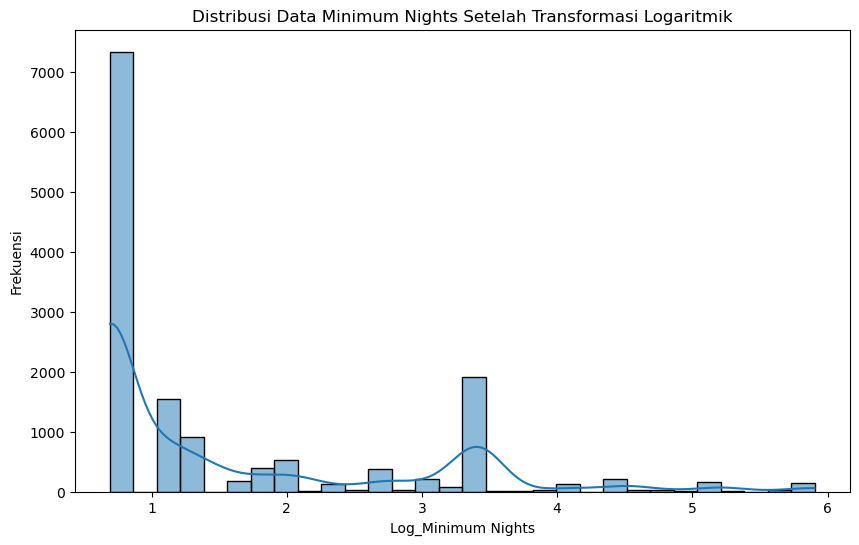

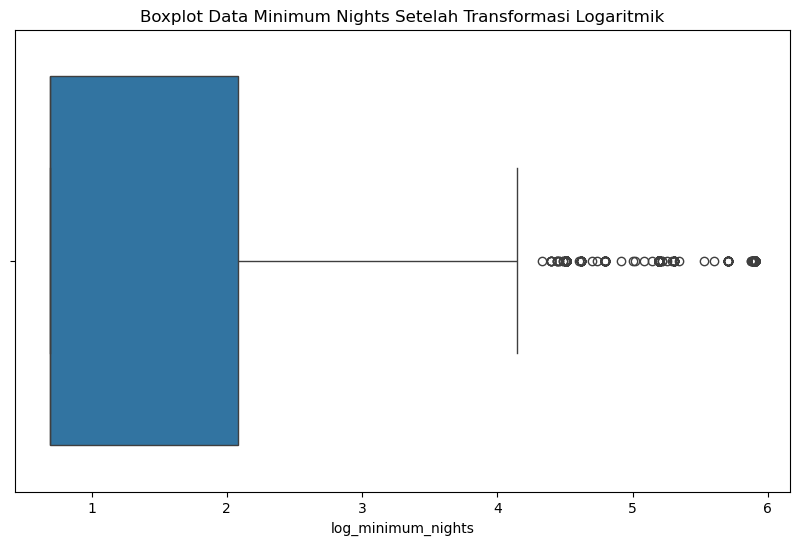

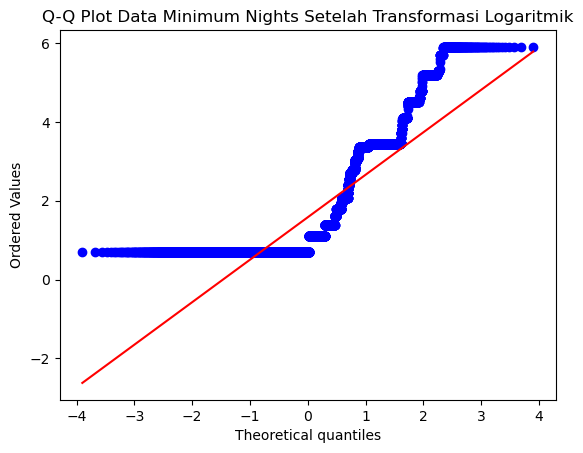

In [177]:
#transformasi logaritmik
df['log_minimum_nights'] = np.log1p(df['minimum_nights'])
plt.figure(figsize=(10, 6))
sns.histplot(df['log_minimum_nights'], kde=True, bins=30)
plt.title("Distribusi Data Minimum Nights Setelah Transformasi Logaritmik")
plt.xlabel("Log_Minimum Nights")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_minimum_nights'])
plt.title("Boxplot Data Minimum Nights Setelah Transformasi Logaritmik")
plt.xlabel("log_minimum_nights")
plt.show()


stats.probplot(df['log_minimum_nights'], dist="norm", plot=plt)
plt.title("Q-Q Plot Data Minimum Nights Setelah Transformasi Logaritmik")
plt.show()

In [178]:
#Uji Anderson-Darling
result_mn = anderson(df['log_minimum_nights'], dist='norm')


print("Anderson-Darling Test Statistic:", result_mn.statistic)
print("\nCritical Values and Significance Levels:")
for significance_level, critical_value in zip(result_mn.significance_level, result_mn.critical_values):
    print(f"Significance Level: {significance_level}%, Critical Value: {critical_value}")

if result.statistic <= result_mn.critical_values[2]:  
    print("\nKesimpulan: Kolom 'minimum_nights' berdistribusi normal pada tingkat signifikansi 5%.")
else:
    print("\nKesimpulan: Kolom 'minimum_nights' tidak berdistribusi normal pada tingkat signifikansi 5%.")


Anderson-Darling Test Statistic: 1594.371923884737

Critical Values and Significance Levels:
Significance Level: 15.0%, Critical Value: 0.576
Significance Level: 10.0%, Critical Value: 0.656
Significance Level: 5.0%, Critical Value: 0.787
Significance Level: 2.5%, Critical Value: 0.918
Significance Level: 1.0%, Critical Value: 1.092

Kesimpulan: Kolom 'minimum_nights' tidak berdistribusi normal pada tingkat signifikansi 5%.


Cek distribusi availability_365

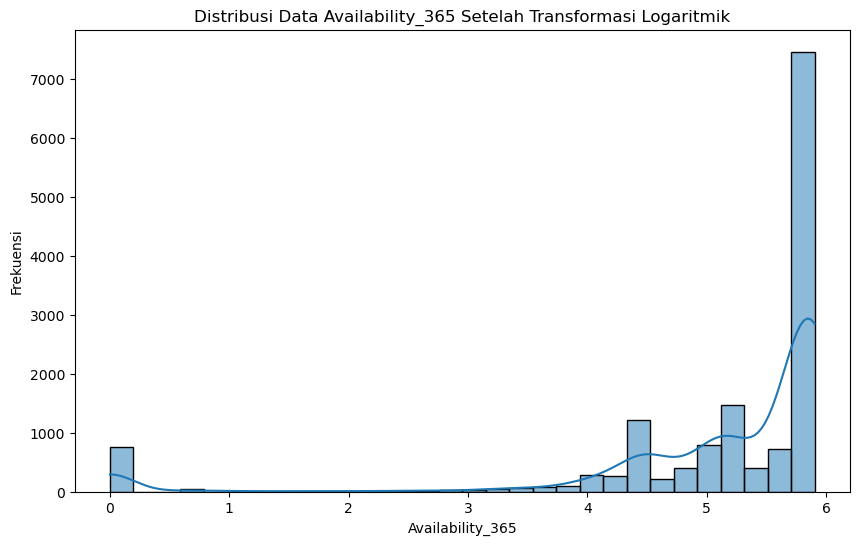

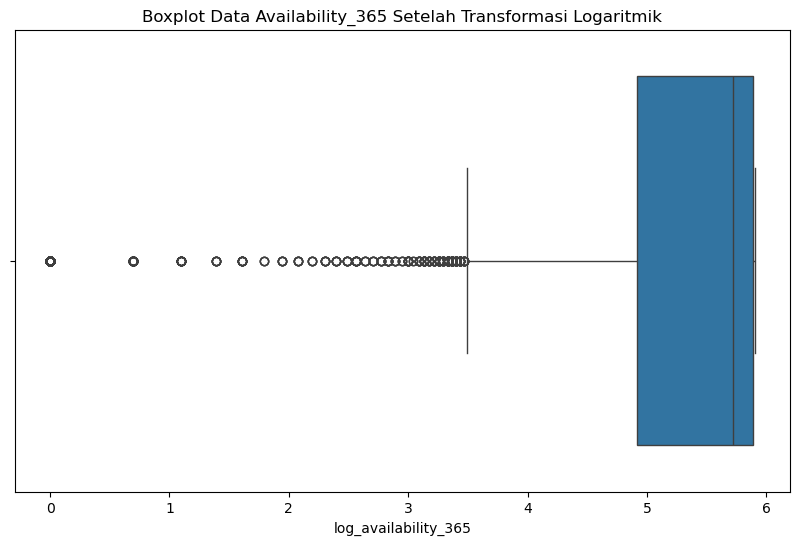

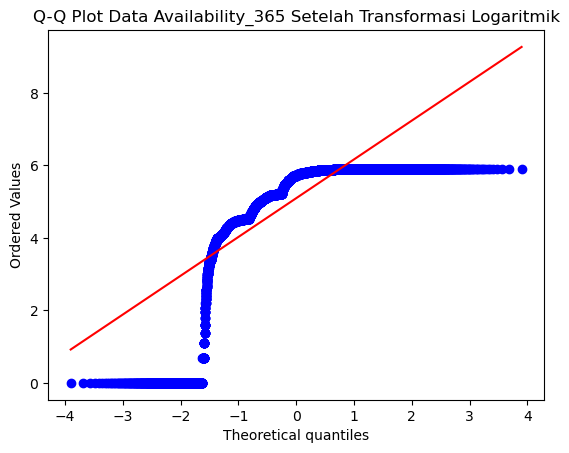

In [179]:
#transformasi logaritmik
df['log_availability_365'] = np.log1p(df['availability_365'])
plt.figure(figsize=(10, 6))
sns.histplot(df['log_availability_365'], kde=True, bins=30)
plt.title("Distribusi Data Availability_365 Setelah Transformasi Logaritmik")
plt.xlabel("Availability_365")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_availability_365'])
plt.title("Boxplot Data Availability_365 Setelah Transformasi Logaritmik")
plt.xlabel("log_availability_365")
plt.show()


stats.probplot(df['log_availability_365'], dist="norm", plot=plt)
plt.title("Q-Q Plot Data Availability_365 Setelah Transformasi Logaritmik")
plt.show()

In [180]:
#Uji Anderson-Darling
result_av = anderson(df['log_availability_365'], dist='norm')


print("Anderson-Darling Test Statistic:", result_av.statistic)
print("\nCritical Values and Significance Levels:")
for significance_level, critical_value in zip(result_av.significance_level, result_av.critical_values):
    print(f"Significance Level: {significance_level}%, Critical Value: {critical_value}")


if result.statistic <= result_av.critical_values[2]:  # Nilai kritis pada alpha=5%
    print("\nKesimpulan: Kolom 'minimum_nights' berdistribusi normal pada tingkat signifikansi 5%.")
else:
    print("\nKesimpulan: Kolom 'minimum_nights' tidak berdistribusi normal pada tingkat signifikansi 5%.")


Anderson-Darling Test Statistic: 1913.3289301084587

Critical Values and Significance Levels:
Significance Level: 15.0%, Critical Value: 0.576
Significance Level: 10.0%, Critical Value: 0.656
Significance Level: 5.0%, Critical Value: 0.787
Significance Level: 2.5%, Critical Value: 0.918
Significance Level: 1.0%, Critical Value: 1.092

Kesimpulan: Kolom 'minimum_nights' tidak berdistribusi normal pada tingkat signifikansi 5%.



Hasil Statistik Terbaik Per Kolom:
              Column  Best_Statistic Best_Data
0              price       18.384877     After
1  number_of_reviews      646.341037     After
2     minimum_nights     1594.371924     After
3   availability_365     1035.062873    Before
4  reviews_per_month     1223.131573     After


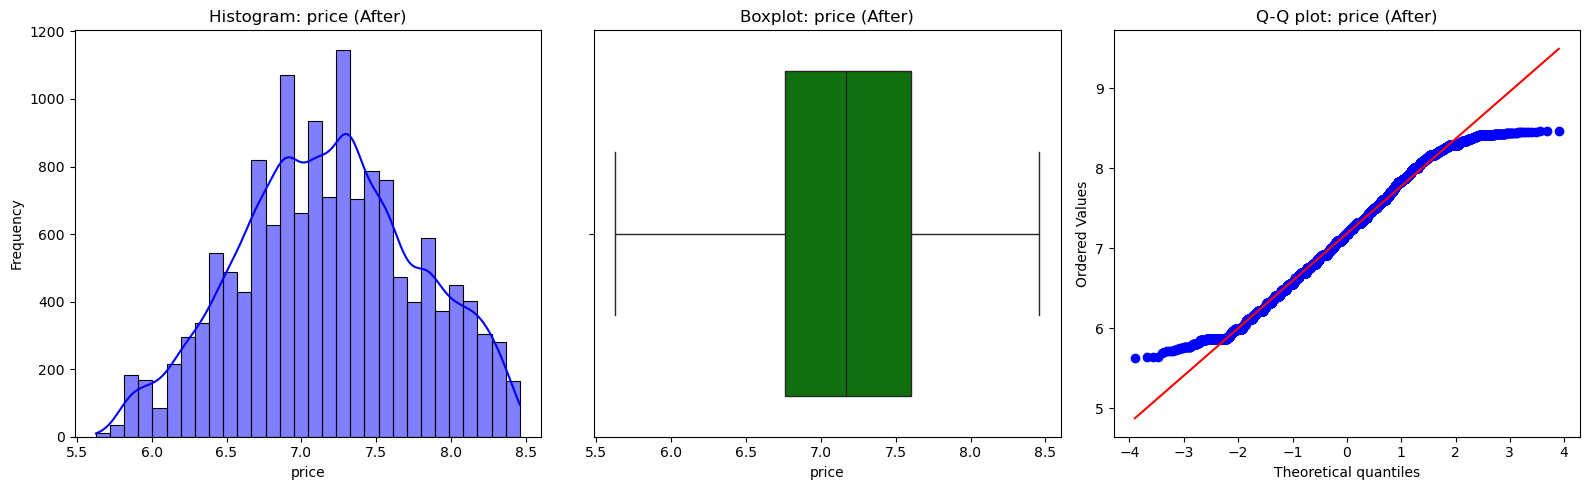

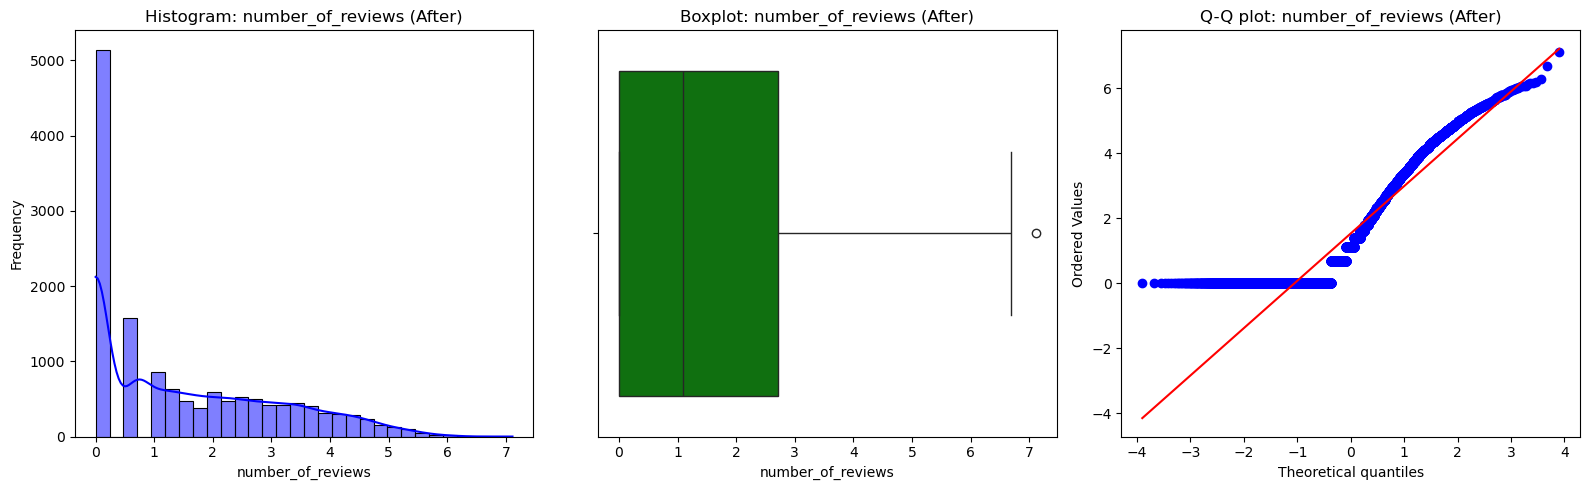

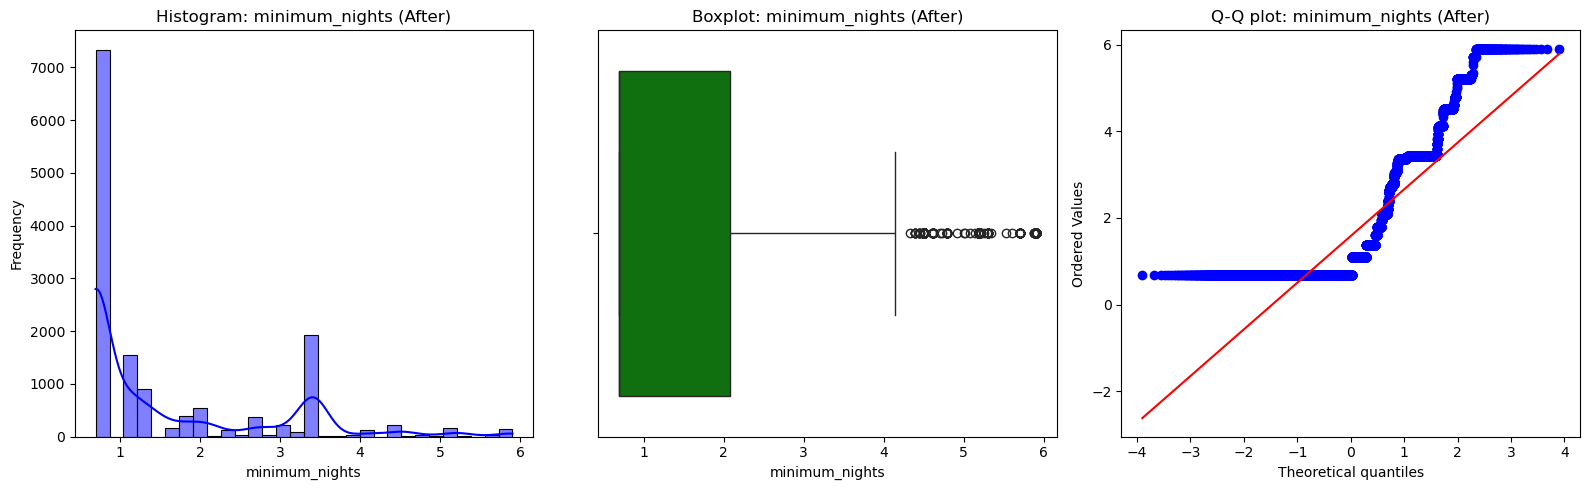

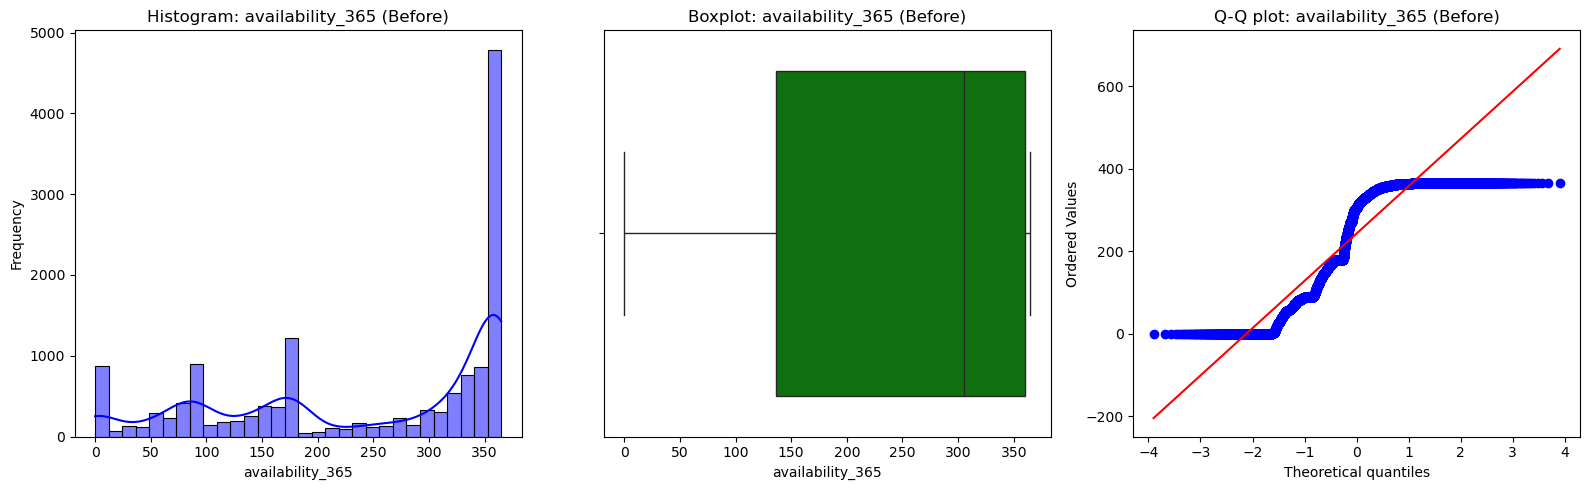

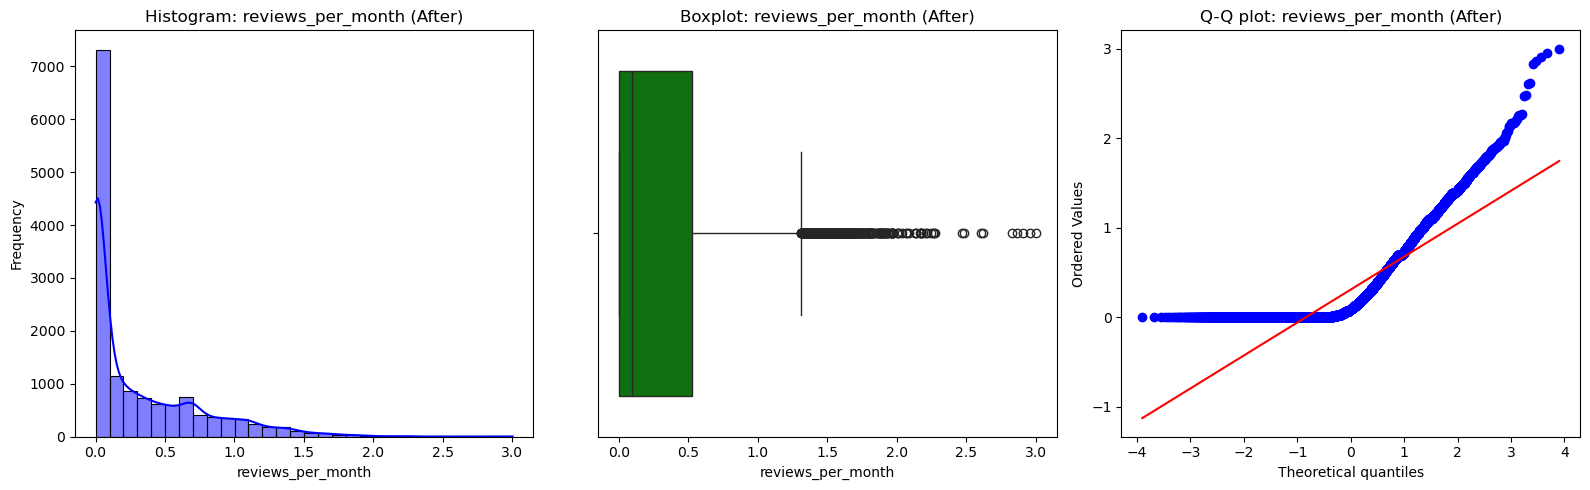

In [181]:
#Persebaran distribusi data numerik setelah proses penanganan data
after_results = {
    'log_price': result_log_price.statistic,
    'log_number_of_reviews': result_nor.statistic,
    'log_reviews_per_month': result_rpm.statistic,
    'log_minimum_nights': result_mn.statistic,
    'log_availability_365': result_av.statistic
}

# Bandingkan hasil sebelum dan sesudah cleaning untuk setiap kolom
results = []
for column in columns_to_test:
    before_stat = before_df.loc[before_df['Column'] == column, 'Anderson-Darling Statistic'].values[0]
    after_stat = after_results[f'log_{column}']
    
    # Pilih statistik terbaik
    if before_stat <= after_stat:
        best_stat = before_stat
        best_data = 'Before'
    else:
        best_stat = after_stat
        best_data = 'After'

    results.append({
        'Column': column,
        'Best_Statistic': best_stat,
        'Best_Data': best_data
    })


results_df = pd.DataFrame(results)
print("\nHasil Statistik Terbaik Per Kolom:")
print(results_df)

# Visualisasi data terbaik untuk setiap kolom
for index, row in results_df.iterrows():
    column = row['Column']
    best_data_type = row['Best_Data']

    if best_data_type == 'Before':
        selected_data = df[column]
    else:
        selected_data = df[f'log_{column}']

    plt.figure(figsize=(16, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(selected_data, kde=True, bins=30, color='blue')
    plt.title(f'Histogram: {column} ({best_data_type})')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=selected_data, color='green')
    plt.title(f'Boxplot: {column} ({best_data_type})')
    plt.xlabel(column)

    # Q-Q Plot
    plt.subplot(1, 3, 3)
    stats.probplot(selected_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot: {column} ({best_data_type})' )


    plt.tight_layout()
    plt.show()

UJI HIPOTESIS:

1. Apakah nilai price berbeda di setiap neighbourhood?

2. Apakah nilai price berbeda di setiap jenis properti (room_type)?

3. Apakah jumlah review berbeda di setiap lokasi?

4. Apakah jumlah review berbeda di setiap jenis properti (room_type)?

5. Apakah jumlah review berbeda di setiap kelompok harga?

In [182]:
#Uji hipotesis price di tiap neighbourhood


neighbourhoods = df['neighbourhood'].unique()
groups = [df[df['neighbourhood'] == n]['price'] for n in neighbourhoods]


stat, p = kruskal(*groups)

print(f"Kruskal-Wallis Statistic: {stat}, p-value: {p}")
if p < 0.05:
    print("Harga di setiap neighbourhood berbeda secara signifikan.")
else:
    print("Tidak ada perbedaan signifikan pada harga di setiap neighbourhood.")


Kruskal-Wallis Statistic: 1797.148686712483, p-value: 0.0
Harga di setiap neighbourhood berbeda secara signifikan.


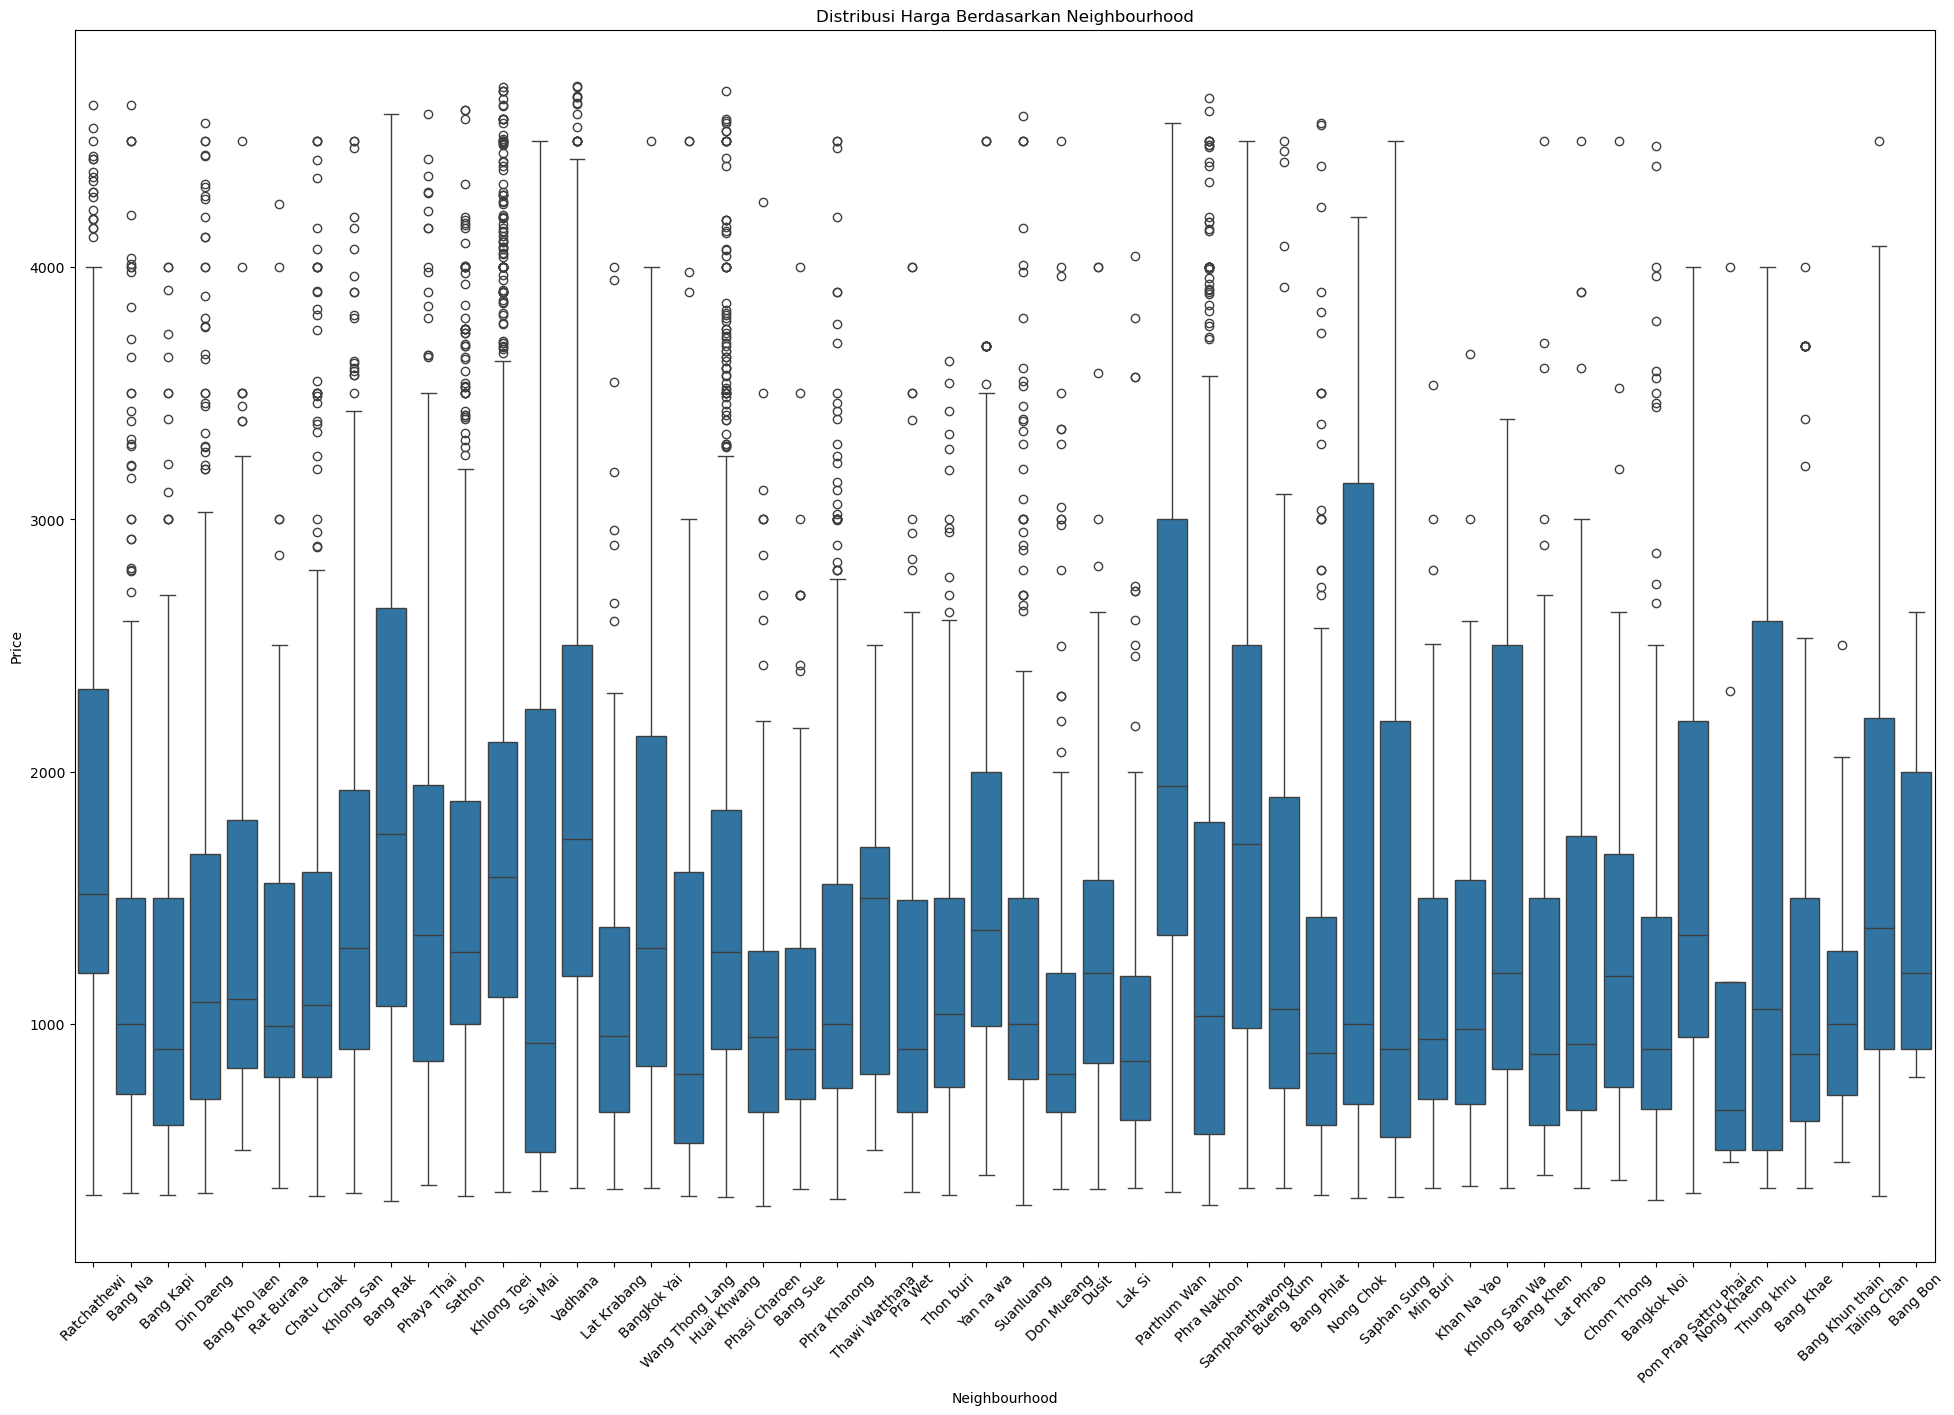

In [183]:
plt.figure(figsize=(24, 16))
sns.boxplot(data=df, x='neighbourhood', y='price')
plt.title('Distribusi Harga Berdasarkan Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [184]:
#Uji hipotesis price di masing-masing tipe properti
room_types = df['room_type'].unique()
groups = [df[df['room_type'] == r]['price'] for r in room_types]

# Uji Kruskal-Wallis
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis Statistic: {stat}, p-value: {p}")
if p < 0.05:
    print("Harga di masing-masing tipe kamar berbeda secara signifikan.")
else:
    print("Tidak ada perbedaan signifikan pada harga di masing-masing tipe kamar.")


Kruskal-Wallis Statistic: 1291.8117307506939, p-value: 8.800803264177601e-280
Harga di masing-masing tipe kamar berbeda secara signifikan.


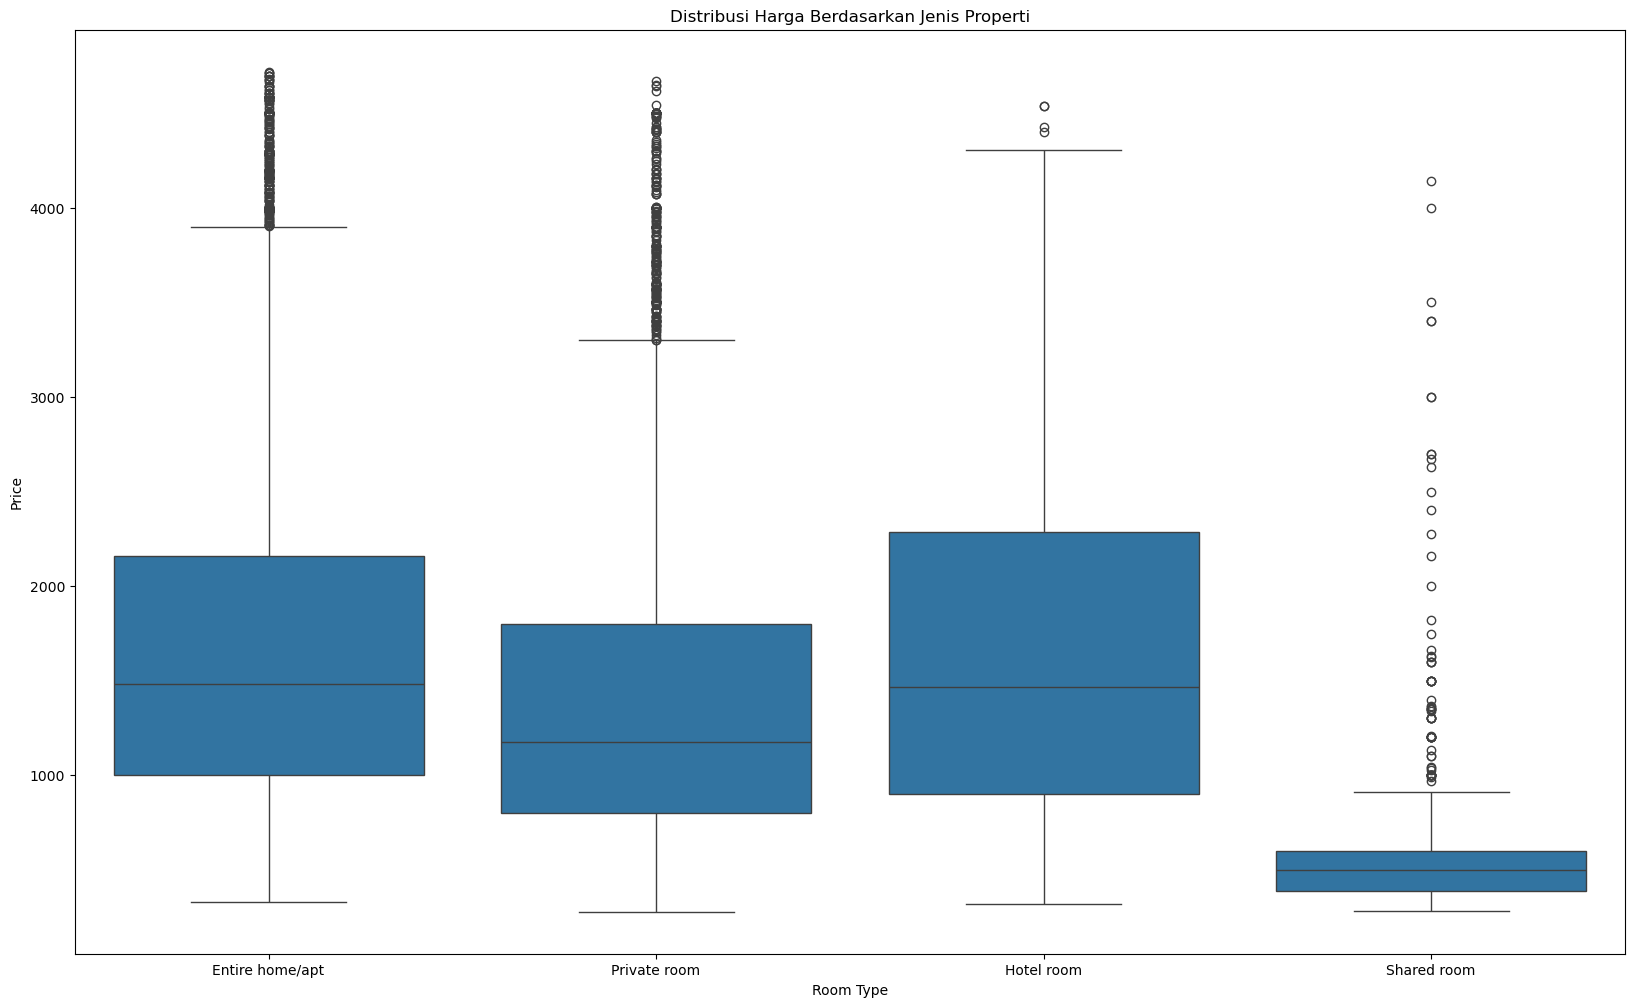

In [185]:
#Visualisasi Barplot Price vs Jenis Properti
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Distribusi Harga Berdasarkan Jenis Properti')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [186]:
#Uji hipotesis jumlah review di masing-masing lokasi
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis Statistic: {stat}, p-value: {p}")
if p < 0.05:
    print("Jumlah review di masing-masing lokasi berbeda secara signifikan.")
else:
    print("Tidak ada perbedaan signifikan pada jumlah review di masing-masing lokasi.")

Kruskal-Wallis Statistic: 1291.8117307506939, p-value: 8.800803264177601e-280
Jumlah review di masing-masing lokasi berbeda secara signifikan.


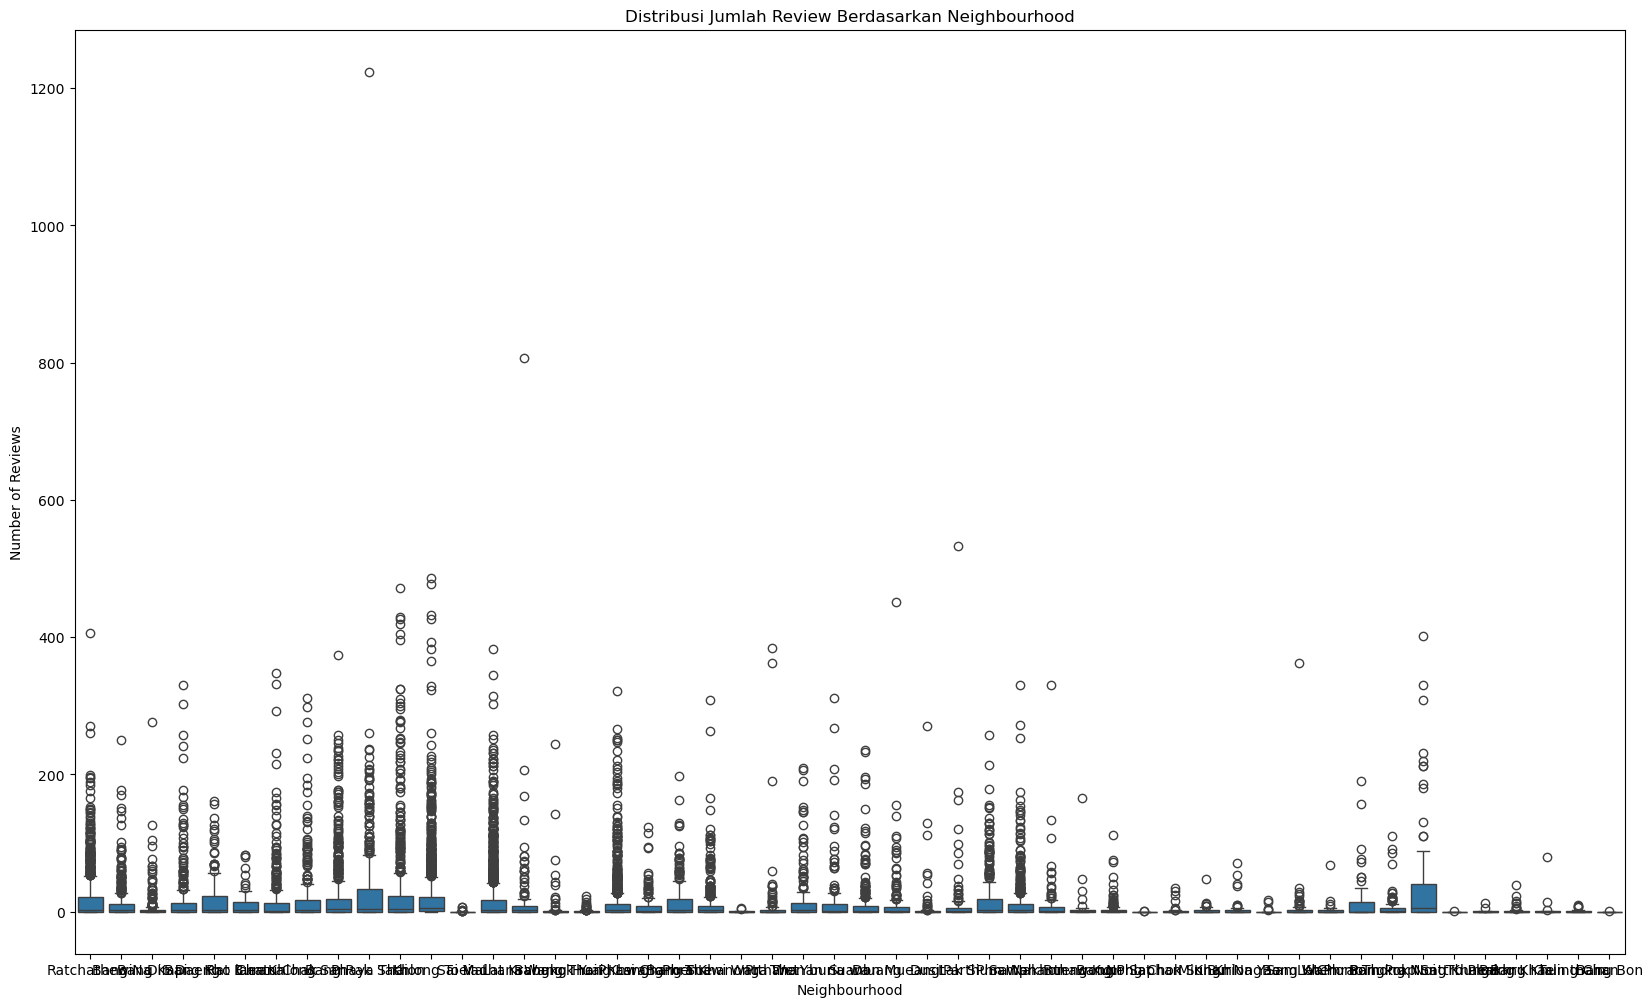

In [187]:
#Visualisasi Jumlah review di masing-masing Neighbourhood
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='neighbourhood', y='number_of_reviews')
plt.title('Distribusi Jumlah Review Berdasarkan Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.show()

In [188]:
#Uji hipotesis Jumlah of review di setiap tipe kamar
groups = [df[df['room_type'] == r]['number_of_reviews'] for r in room_types]

# Uji Kruskal-Wallis
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis Statistic: {stat}, p-value: {p}")
if p < 0.05:
    print("Jumlah review di masing-masing tipe kamar berbeda secara signifikan.")
else:
    print("Tidak ada perbedaan signifikan pada jumlah review di masing-masing tipe kamar.")

Kruskal-Wallis Statistic: 1291.4651615353903, p-value: 1.0464553128804714e-279
Jumlah review di masing-masing tipe kamar berbeda secara signifikan.


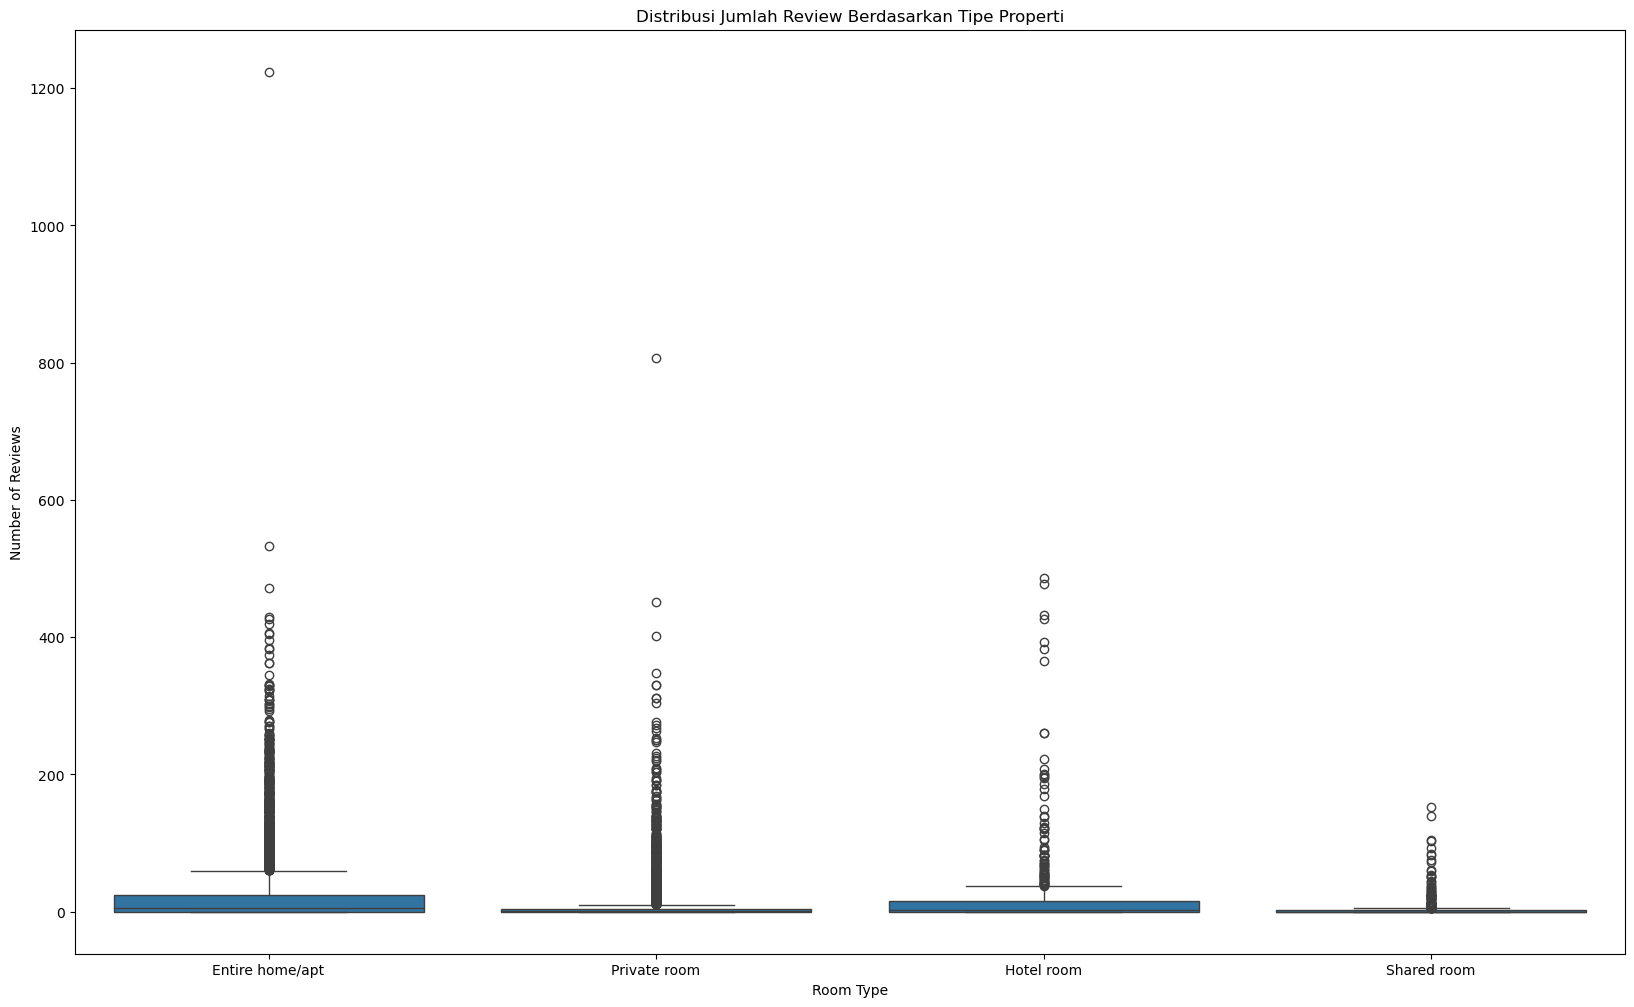

In [189]:
#Visualisasi Distribusi Data Jumlah Review di Setiap Tipe Properti
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='room_type', y='number_of_reviews')
plt.title('Distribusi Jumlah Review Berdasarkan Tipe Properti')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()

In [190]:
#Uji Hipotesis Harga terhadap Jumlah Review
# Hitung kuantil untuk membagi data menjadi 5 kategori
quantiles = df['price'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])

# Tampilkan range harga berdasarkan kuantil
categories = {
    'Sangat Murah': (0, quantiles[0.2]),
    'Murah': (quantiles[0.2], quantiles[0.4]),
    'Normal': (quantiles[0.4], quantiles[0.6]),
    'Mahal': (quantiles[0.6], quantiles[0.8]),
    'Sangat Mahal': (quantiles[0.8], quantiles[1.0])
}

for category, (low, high) in categories.items():
    print(f"{category}: {low:.2f} - {high:.2f}")

Sangat Murah: 0.00 - 799.00
Murah: 799.00 - 1100.00
Normal: 1100.00 - 1500.00
Mahal: 1500.00 - 2250.00
Sangat Mahal: 2250.00 - 4720.00


In [191]:
df['price_category'] = pd.cut(
    df['price'],
    bins=[-1, quantiles[0.2], quantiles[0.4], quantiles[0.6], quantiles[0.8], quantiles[1.0]],
    labels=['Sangat Murah', 'Murah', 'Normal', 'Mahal', 'Sangat Mahal']
)


print(df['price_category'].value_counts())
price_categories = df['price_category'].unique()
groups = [df[df['price_category'] == category]['number_of_reviews'] for category in price_categories]

# Uji Kruskal-Wallis
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis Statistic: {stat}, p-value: {p}")
if p < 0.05:
    print("Jumlah review di setiap kategori harga berbeda secara signifikan.")
else:
    print("Tidak ada perbedaan signifikan pada jumlah review di setiap kategori harga.")


price_category
Normal          2947
Sangat Murah    2907
Sangat Mahal    2872
Murah           2871
Mahal           2843
Name: count, dtype: int64
Kruskal-Wallis Statistic: 46.28191630163919, p-value: 2.1516125675519125e-09
Jumlah review di setiap kategori harga berbeda secara signifikan.


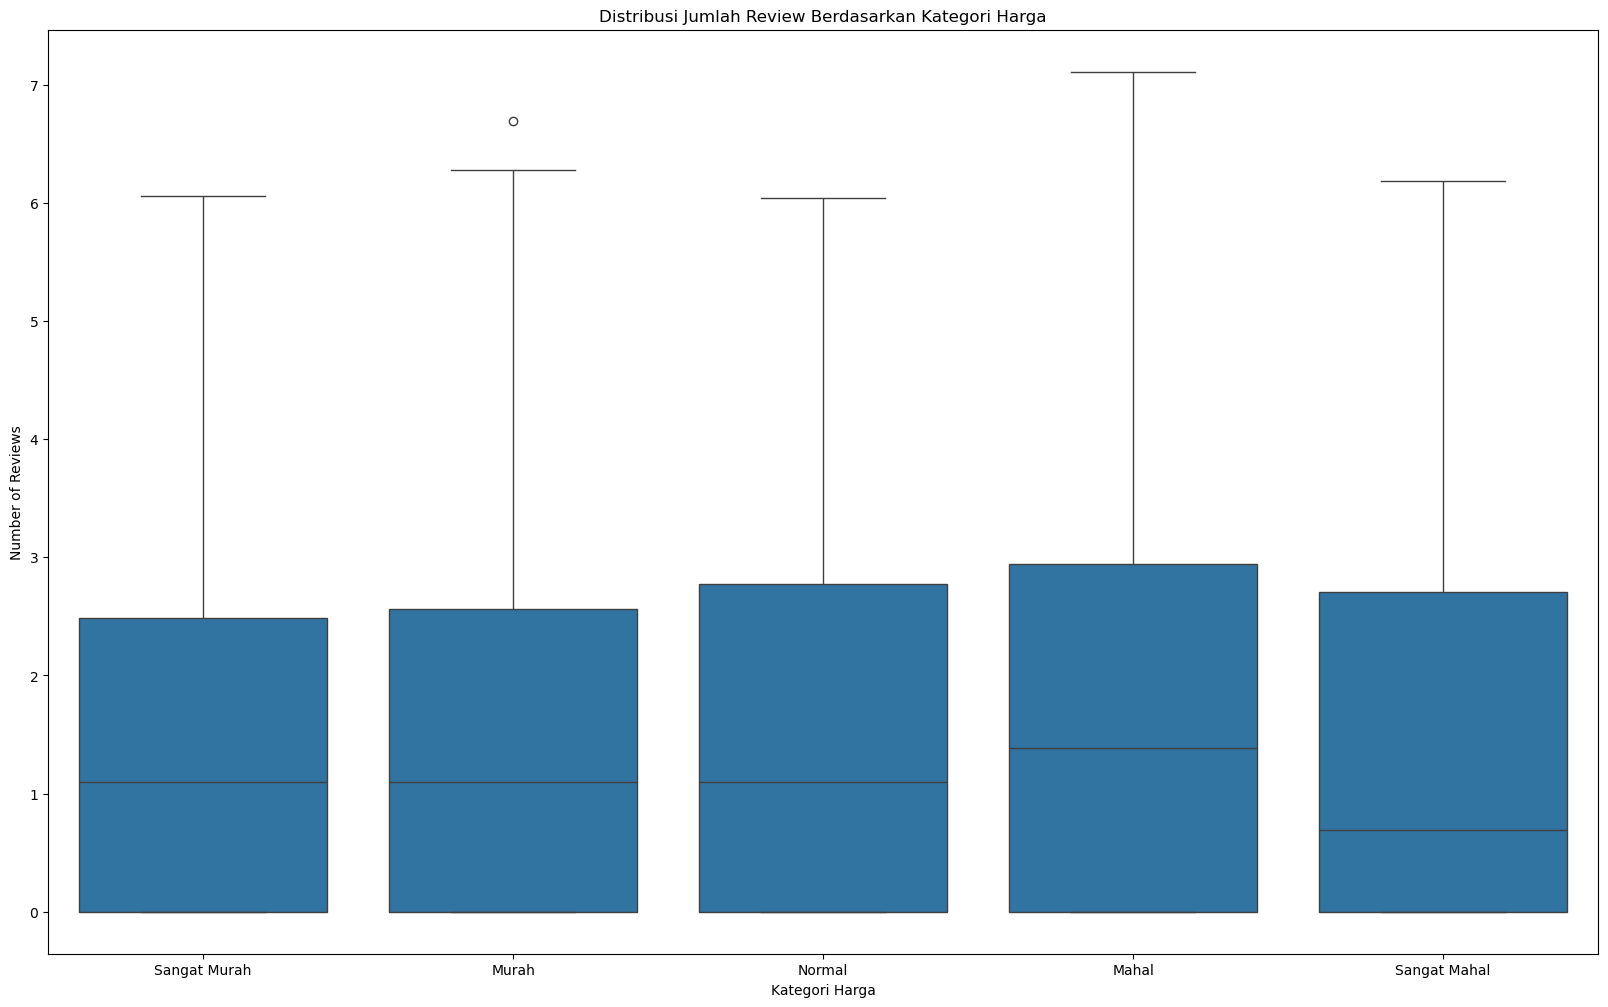

In [192]:
#Price vs Number of Reviews
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='price_category', y='log_number_of_reviews')
plt.title('Distribusi Jumlah Review Berdasarkan Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Number of Reviews')
plt.show()

CEK KORELASI

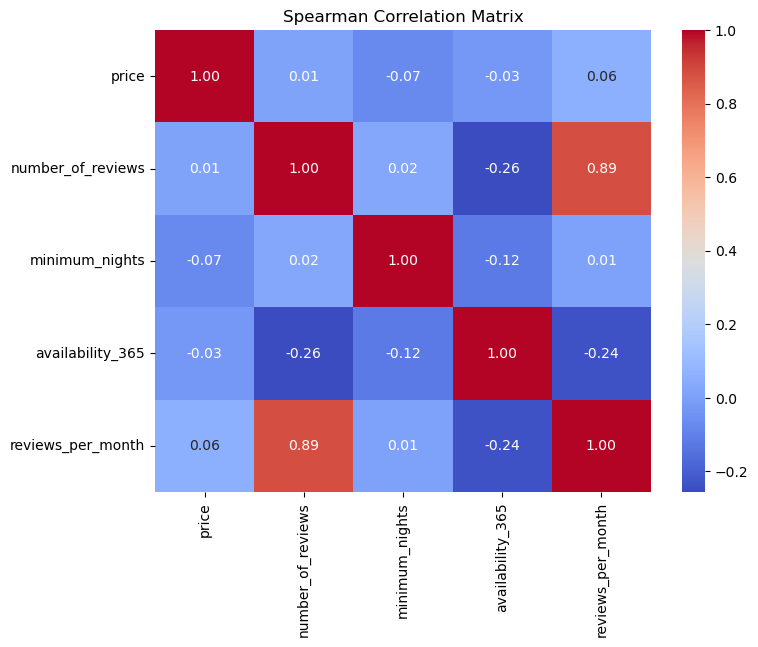

                      price  number_of_reviews  minimum_nights  \
price              1.000000           0.010798       -0.070408   
number_of_reviews  0.010798           1.000000        0.024958   
minimum_nights    -0.070408           0.024958        1.000000   
availability_365  -0.027159          -0.256416       -0.123746   
reviews_per_month  0.055655           0.886580        0.005363   

                   availability_365  reviews_per_month  
price                     -0.027159           0.055655  
number_of_reviews         -0.256416           0.886580  
minimum_nights            -0.123746           0.005363  
availability_365           1.000000          -0.241574  
reviews_per_month         -0.241574           1.000000  


In [193]:
#Heatmap Korelasi
columns_to_check = ['price', 'number_of_reviews', 'minimum_nights', 'availability_365', 'reviews_per_month']


spearman_correlation = df[columns_to_check].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Spearman Correlation Matrix")
plt.show()

# Tampilkan tabel korelasi
print(spearman_correlation)

In [194]:
def interpret_spearman_correlation(correlation_matrix, threshold=0.5):
    
    interpretation = {
        "strong_positive": [],
        "strong_negative": [],
        "moderate_positive": [],
        "moderate_negative": [],
        "weak": []
    }

    for row in correlation_matrix.index:
        for col in correlation_matrix.columns:
            if row != col:  # Avoid interpreting diagonal values (self-correlation)
                value = correlation_matrix.loc[row, col]

                if abs(value) > threshold:
                    if value > 0:
                        interpretation["strong_positive"].append((row, col, value))
                    else:
                        interpretation["strong_negative"].append((row, col, value))
                elif abs(value) > threshold / 2:
                    if value > 0:
                        interpretation["moderate_positive"].append((row, col, value))
                    else:
                        interpretation["moderate_negative"].append((row, col, value))
                else:
                    interpretation["weak"].append((row, col, value))

    return interpretation

# Contoh penggunaan
correlation_interpretation = interpret_spearman_correlation(spearman_correlation)

print("Interpretasi Korelasi:")
for category, relations in correlation_interpretation.items():
    print(f"\n{category.replace('_', ' ').capitalize()}:")
    for relation in relations:
        print(f"{relation[0]} - {relation[1]}: {relation[2]:.2f}")


Interpretasi Korelasi:

Strong positive:
number_of_reviews - reviews_per_month: 0.89
reviews_per_month - number_of_reviews: 0.89

Strong negative:

Moderate positive:

Moderate negative:
number_of_reviews - availability_365: -0.26
availability_365 - number_of_reviews: -0.26

Weak:
price - number_of_reviews: 0.01
price - minimum_nights: -0.07
price - availability_365: -0.03
price - reviews_per_month: 0.06
number_of_reviews - price: 0.01
number_of_reviews - minimum_nights: 0.02
minimum_nights - price: -0.07
minimum_nights - number_of_reviews: 0.02
minimum_nights - availability_365: -0.12
minimum_nights - reviews_per_month: 0.01
availability_365 - price: -0.03
availability_365 - minimum_nights: -0.12
availability_365 - reviews_per_month: -0.24
reviews_per_month - price: 0.06
reviews_per_month - minimum_nights: 0.01
reviews_per_month - availability_365: -0.24


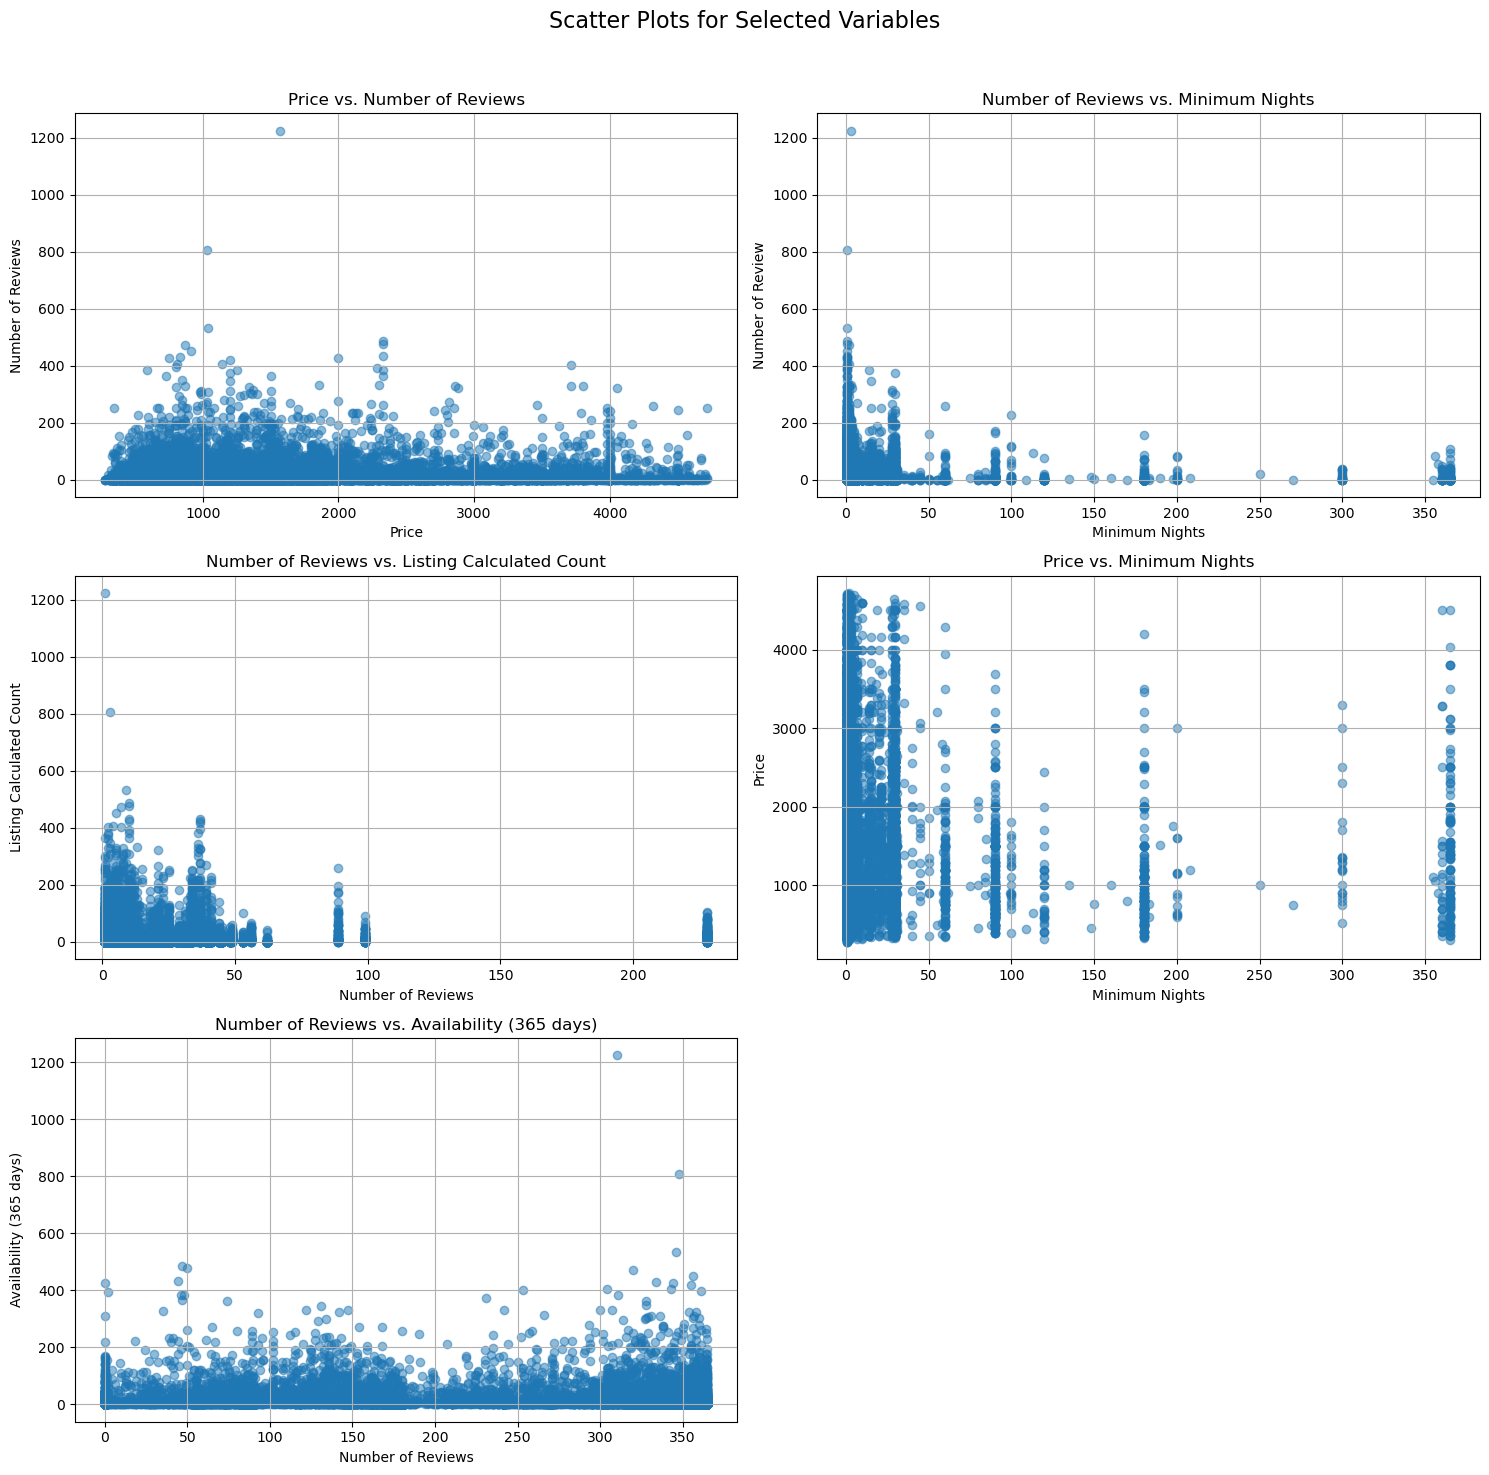

In [195]:
#Scatter Plot
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # 3 baris, 2 kolom
fig.suptitle("Scatter Plots for Selected Variables", fontsize=16)

# Scatter plot: price vs. number_of_reviews
axes[0, 0].scatter(df['price'], df['number_of_reviews'], alpha=0.5)
axes[0, 0].set_title('Price vs. Number of Reviews')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Number of Reviews')

# Scatter plot: number_of_reviews vs. minimum_nights
axes[0, 1].scatter(df['minimum_nights'], df['number_of_reviews'] ,alpha=0.5)
axes[0, 1].set_title('Number of Reviews vs. Minimum Nights')
axes[0, 1].set_xlabel('Minimum Nights')
axes[0, 1].set_ylabel('Number of Review')

# Scatter plot: number_of_reviews vs. listing_calculated_count
axes[1, 0].scatter(df['calculated_host_listings_count'], df['number_of_reviews'], alpha=0.5)
axes[1, 0].set_title('Number of Reviews vs. Listing Calculated Count')
axes[1, 0].set_xlabel('Number of Reviews')
axes[1, 0].set_ylabel('Listing Calculated Count')

# Scatter plot: price vs. minimum_nights
axes[1, 1].scatter(df['minimum_nights'],df['price'], alpha=0.5)
axes[1, 1].set_title('Price vs. Minimum Nights')
axes[1, 1].set_xlabel('Minimum Nights')
axes[1, 1].set_ylabel('Price')

# Scatter plot: number_of_reviews vs. availability_365
axes[2, 0].scatter(df['availability_365'], df['number_of_reviews'], alpha=0.5)
axes[2, 0].set_title('Number of Reviews vs. Availability (365 days)')
axes[2, 0].set_xlabel('Number of Reviews')
axes[2, 0].set_ylabel('Availability (365 days)')

# Kosongkan subplot terakhir jika grid tidak penuh
axes[2, 1].axis('off')


for ax in axes.flat:
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Cek Statistik Deskriptif Data Akhir

In [196]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,log_price,log_number_of_reviews,log_reviews_per_month,log_minimum_nights,log_availability_365
count,14440.000000,1.444000e+04,1.444000e+04,14440.000000,14440.000000,14440.000000,14440.000000,14440.000000,11381,14440.000000,14440.000000,14440.000000,14440.000000,14440.000000,14440.000000,14440.000000,14440.000000,14440.000000
mean,7893.442936,1.579295e+17,1.528305e+08,13.745590,100.560002,1563.946953,14.856925,17.076454,2021-09-22 09:05:42.570951680,0.524321,14.054017,243.181856,3.520083,7.182095,1.530449,0.310989,1.582373,5.094714
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,278.000000,1.000000,0.000000,2012-12-15 00:00:00,0.000000,1.000000,0.000000,0.000000,5.627621,0.000000,0.000000,0.693147,0.000000
25%,3874.750000,2.088009e+07,4.026211e+07,13.719407,100.529160,864.000000,1.000000,0.000000,2020-02-28 00:00:00,0.000000,1.000000,136.000000,0.000000,6.761573,0.000000,0.000000,0.693147,4.919981
50%,7880.500000,3.494876e+07,1.211513e+08,13.738910,100.561540,1300.000000,1.000000,2.000000,2022-11-03 00:00:00,0.100000,4.000000,305.000000,0.000000,7.170120,1.098612,0.095310,0.693147,5.723585
75%,11874.250000,5.250324e+07,2.354447e+08,13.760343,100.585880,2000.000000,7.000000,14.000000,2022-12-11 00:00:00,0.690000,13.000000,360.000000,3.000000,7.600902,2.708050,0.524729,2.079442,5.888878
max,15853.000000,7.907510e+17,4.926659e+08,13.953540,100.923440,4720.000000,365.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000,8.459564,7.110696,3.002211,5.902633,5.902633
std,4596.791173,2.947444e+17,1.312425e+08,0.043893,0.051580,942.613448,44.201697,41.439756,NaN,0.960120,30.979045,125.470132,8.984269,0.594456,1.560911,0.420424,1.257524,1.390067


Simpan data akhir

In [197]:
# df.to_excel("Airbnb_Listings_Bangkok_Clean_Capstone.xlsx", index=False)